# ANALYSING THE IMPACT OF LIFE EXPECTANCY ON HEALTHCARE EXPENDITURE, AGE DEPENDENCY RATIO, AND ECONOMIC PRODUCTIVITY

## DATA CLEANING AND PREPROCESSING

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_excel('final_dataset.xlsx')
df

Country Name  Year          GDP  Life Expectancy  Health Expenditure  \
0     Afghanistan  2004   221.763654           57.944            9.808474   
1     Afghanistan  2005   254.184249           58.361            9.948289   
2     Afghanistan  2006   274.218554           58.684           10.622766   
3     Afghanistan  2007   376.223152           59.111            9.904675   
4     Afghanistan  2008   381.733238           59.852           10.256495   
...           ...   ...          ...              ...                 ...   
2174     Zimbabwe  2019  1684.027904           61.292            3.232802   
2175     Zimbabwe  2020  1730.413489           61.124            2.954401   
2176     Zimbabwe  2021  1724.387731           59.253            2.789751   
2177     Zimbabwe  2022  2040.552459           59.391            0.000000   
2178     Zimbabwe  2023  2156.034004            0.000            0.000000   

      Age Dependency  Population  Retirement age  Elderly care  \
0         110.285308    23560654             NaN           NaN   
1         109.728525    24404567             NaN           NaN   
2         108.889135    25424094             NaN           NaN   
3         107.737251    25909852             NaN           NaN   
4         106.334376    26482622             NaN           NaN   
...              ...         ...             ...           ...   
2174       85.447906    15271368             NaN           NaN   
2175       84.384381    15526888             NaN           NaN   
2176       83.384953    15797210             NaN           NaN   
2177       82.547605    16069056             NaN           NaN   
2178       81.625352    16340822             NaN           NaN   

      Healthcare Costs  Aging Population     GNI  Fertility Rate  \
0                  NaN               NaN   210.0           7.018   
1                  NaN               NaN   250.0           6.858   
2                  NaN               NaN   270.0           6.686   
3                  NaN               NaN   330.0           6.508   
4                  NaN               NaN   370.0           6.392   
...                ...               ...     ...             ...   
2174               NaN               NaN  2170.0           3.748   
2175               NaN               NaN  1690.0           3.754   
2176               NaN               NaN  1740.0           3.765   
2177               NaN               NaN  1960.0           3.767   
2178               NaN               NaN  2060.0           3.724   

      Labour Participation  
0                   46.507  
1                   46.532  
2                   46.570  
3                   46.621  
4                   46.680  
...                    ...  
2174                65.795  
2175                64.763  
2176                65.398  
2177                65.214  
2178                65.001  

[2179 rows x 14 columns]

In [3]:
# Dataset without Google Trends columns
trend_columns = ['Retirement age', 'Elderly care', 'Healthcare Costs', 'Aging Population']
df_core = df.drop(columns=trend_columns)

In [4]:
df_core

Country Name  Year          GDP  Life Expectancy  Health Expenditure  \
0     Afghanistan  2004   221.763654           57.944            9.808474   
1     Afghanistan  2005   254.184249           58.361            9.948289   
2     Afghanistan  2006   274.218554           58.684           10.622766   
3     Afghanistan  2007   376.223152           59.111            9.904675   
4     Afghanistan  2008   381.733238           59.852           10.256495   
...           ...   ...          ...              ...                 ...   
2174     Zimbabwe  2019  1684.027904           61.292            3.232802   
2175     Zimbabwe  2020  1730.413489           61.124            2.954401   
2176     Zimbabwe  2021  1724.387731           59.253            2.789751   
2177     Zimbabwe  2022  2040.552459           59.391            0.000000   
2178     Zimbabwe  2023  2156.034004            0.000            0.000000   

      Age Dependency  Population     GNI  Fertility Rate  Labour Participation  
0         110.285308    23560654   210.0           7.018                46.507  
1         109.728525    24404567   250.0           6.858                46.532  
2         108.889135    25424094   270.0           6.686                46.570  
3         107.737251    25909852   330.0           6.508                46.621  
4         106.334376    26482622   370.0           6.392                46.680  
...              ...         ...     ...             ...                   ...  
2174       85.447906    15271368  2170.0           3.748                65.795  
2175       84.384381    15526888  1690.0           3.754                64.763  
2176       83.384953    15797210  1740.0           3.765                65.398  
2177       82.547605    16069056  1960.0           3.767                65.214  
2178       81.625352    16340822  2060.0           3.724                65.001  

[2179 rows x 10 columns]

In [5]:
# Replace placeholder values with NaN
df_core.replace(["N/A", "n/a", "..", "-", "—", "NaN", ""], np.nan, inplace=True)

In [6]:
# Attempt to convert all columns to numeric where possible
for col in df_core.columns:
    df_core[col] = pd.to_numeric(df_core[col], errors='ignore') 

C:\Users\dell1\AppData\Local\Temp\ipykernel_14960\599174277.py:3: FutureWarning: errors='ignore' is deprecated and will raise in a future version. Use to_numeric without passing `errors` and catch exceptions explicitly instead
  df_core[col] = pd.to_numeric(df_core[col], errors='ignore')


In [7]:
# Separate numeric and non-numeric
numeric_cols = df_core.select_dtypes(include='number').columns
categorical_cols = df_core.select_dtypes(include='object').columns

# Impute numeric with median
df_core[numeric_cols] = df_core[numeric_cols].apply(lambda col: col.fillna(col.median()))


In [8]:
# Final check for missing values
print("Remaining missing values:\n", df_core.isnull().sum())

Remaining missing values:
 Country Name            0
Year                    0
GDP                     0
Life Expectancy         0
Health Expenditure      0
Age Dependency          0
Population              0
GNI                     0
Fertility Rate          0
Labour Participation    0
dtype: int64


In [9]:
# Convert year to int if it's float
df_core['Year'] = df_core['Year'].astype(int)


In [10]:
# Summary statistics
print("\nSummary statistics:\n", df_core.describe())


Summary statistics:
               Year            GDP  Life Expectancy  Health Expenditure  \
count  2179.000000    2179.000000      2179.000000         2179.000000   
mean   2013.504360   19475.478616        70.011063            5.764761   
std       5.765334   23180.143671        17.756848            3.374517   
min    2004.000000       0.000000         0.000000            0.000000   
25%    2009.000000    2868.863802        68.272500            3.670035   
50%    2014.000000    8908.331766        74.827000            5.660000   
75%    2018.500000   30757.610621        79.453890            8.165000   
max    2023.000000  133711.794436        85.532683           21.827950   

       Age Dependency    Population            GNI  Fertility Rate  \
count     2179.000000  2.179000e+03    2179.000000     2179.000000   
mean        54.957503  5.940677e+07   18659.798073        2.394241   
std         17.092692  1.815313e+08   21498.930408        1.378801   
min         17.302757  2.672980

## EXPLORATORY DATA ANALYSIS

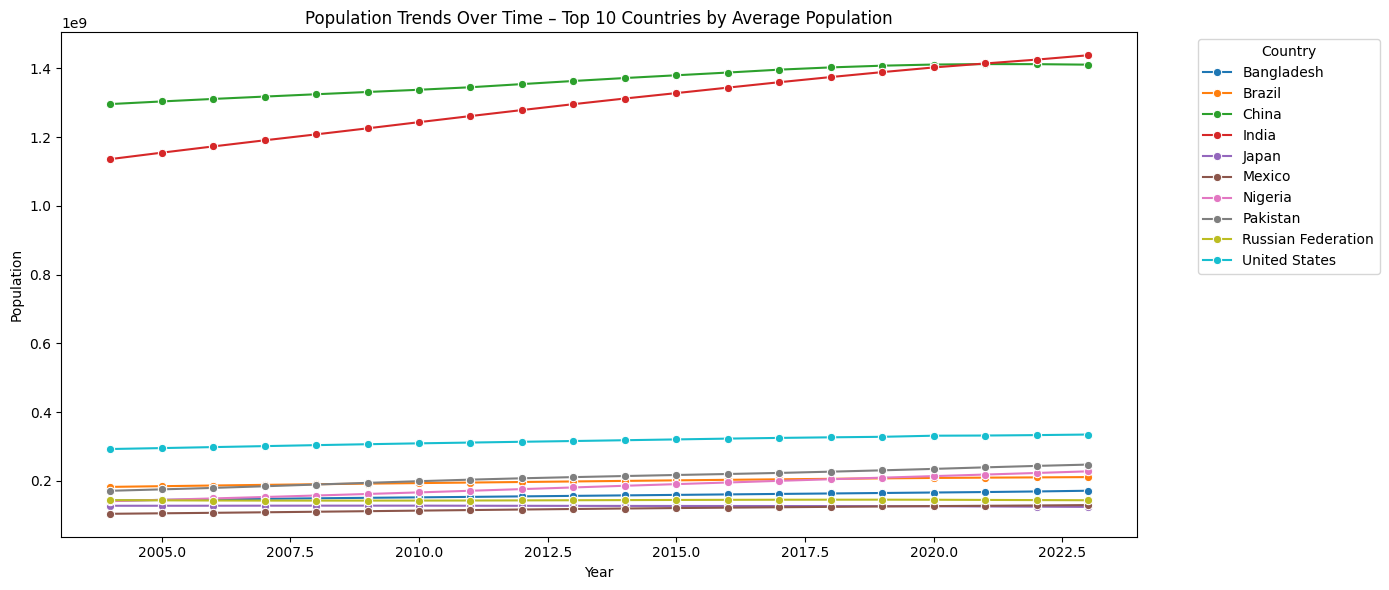

In [11]:
# Calculate top 10 countries by average population
top10_population_countries = (
    df_core.groupby('Country Name')['Population']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter data for only these countries
df_top10_population = df_core[df_core['Country Name'].isin(top10_population_countries)]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top10_population, x='Year', y='Population', hue='Country Name', marker='o')
plt.title("Population Trends Over Time – Top 10 Countries by Average Population")
plt.xlabel("Year")
plt.ylabel("Population")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


India and China consistently had the highest populations, with India surpassing China around 2022. The U.S. maintained steady growth, while countries like Japan and Russia showed minimal or stagnant population growth. Nigeria exhibited a notable upward trend, reflecting rapid demographic expansion

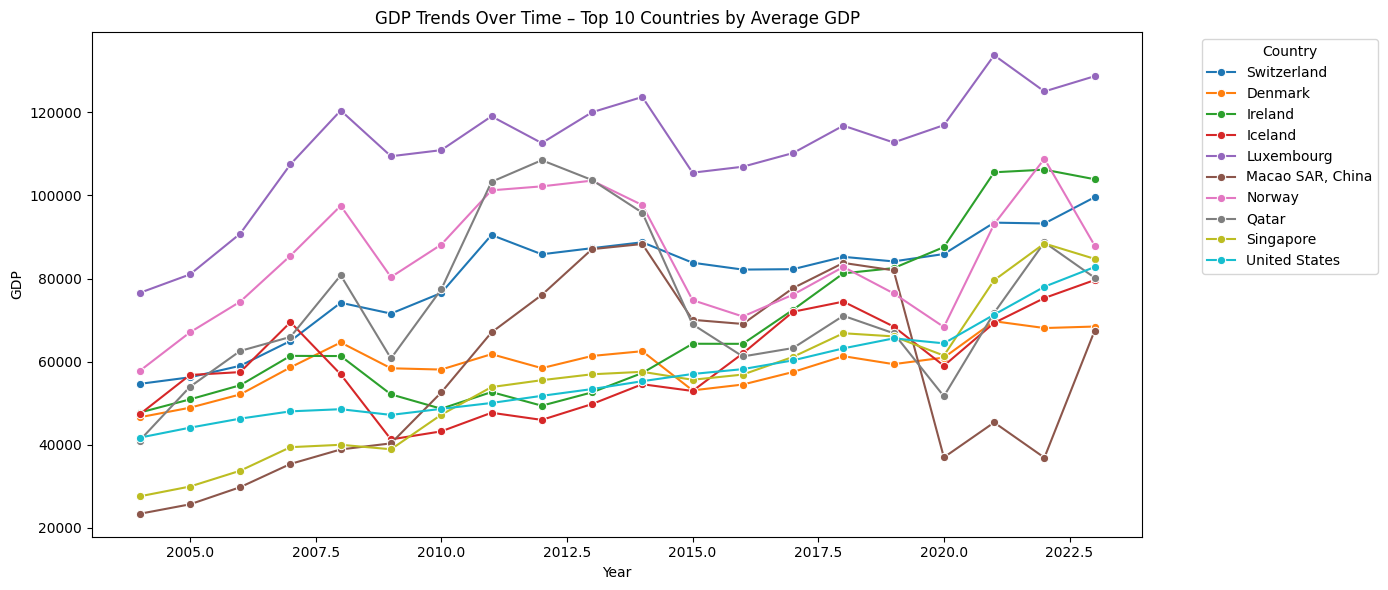

In [12]:
# Calculate top 10 countries by average GDP
top10_countries = (
    df_core.groupby('Country Name')['GDP']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter data for only these countries
df_top10 = df_core[df_core['Country Name'].isin(top10_countries)]

#Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top10, x='Year', y='GDP', hue='Country Name', marker='o')
plt.title("GDP Trends Over Time – Top 10 Countries by Average GDP")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Monaco consistently holds the highest GDP per capita throughout the period, with a notable surge in 2022. While several countries show robust growth, Luxembourg experiences a dramatic and uncharacteristic drop in 2022, becoming the lowest among the top performers shown in that specific year, likely due to a significant economic event or data revision.

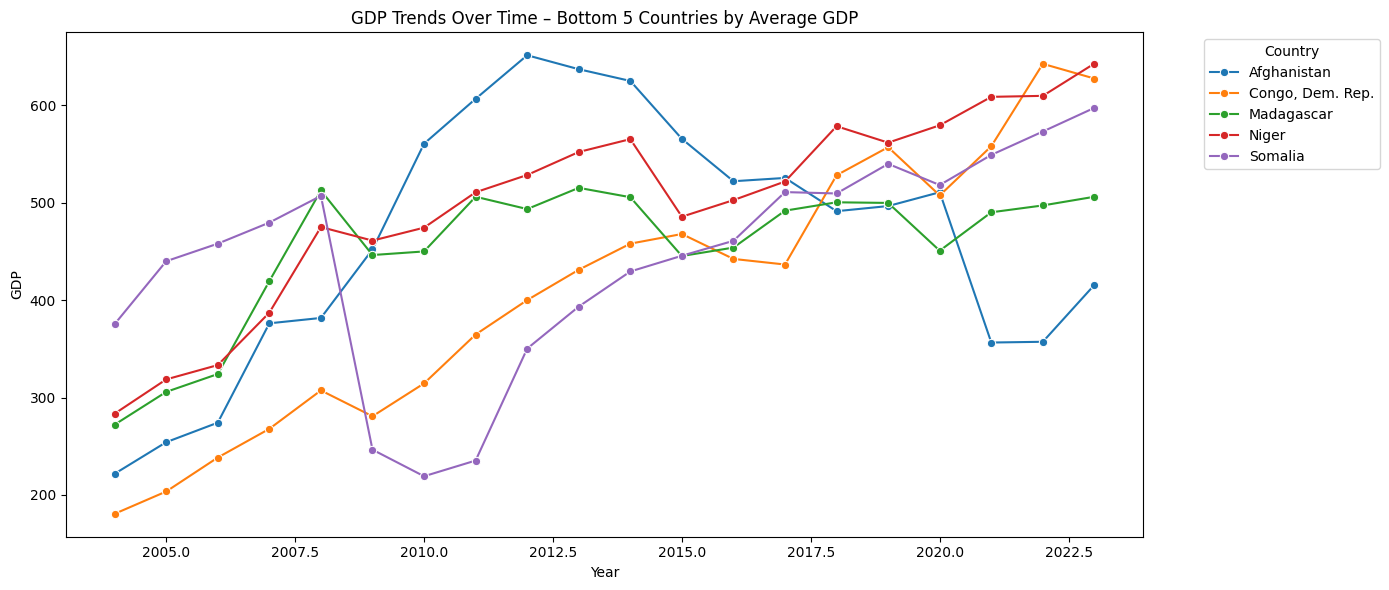

In [13]:
# Calculate bottom 5 countries by average GDP
bottom5_countries = (
    df_core.groupby('Country Name')['GDP']
    .mean()
    .sort_values(ascending=True)   # ascending = lowest GDP first
    .head(5)
    .index
)

# Filter data for only these countries
df_bottom5 = df_core[df_core['Country Name'].isin(bottom5_countries)]

# Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_bottom5, x='Year', y='GDP', hue='Country Name', marker='o')
plt.title("GDP Trends Over Time – Bottom 5 Countries by Average GDP")
plt.xlabel("Year")
plt.ylabel("GDP")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


Among these "Bottom 5 Countries by Average GDP," Niger and Somalia generally exhibit the highest GDP per capita trends, with Somalia showing strong recent growth. In stark contrast, Afghanistan experiences a significant and sustained decline, ending as the country with the lowest GDP per capita by 2022. The low overall GDP values and high volatility across all nations highlight the persistent economic challenges faced by these developing countries, often exacerbated by instability.

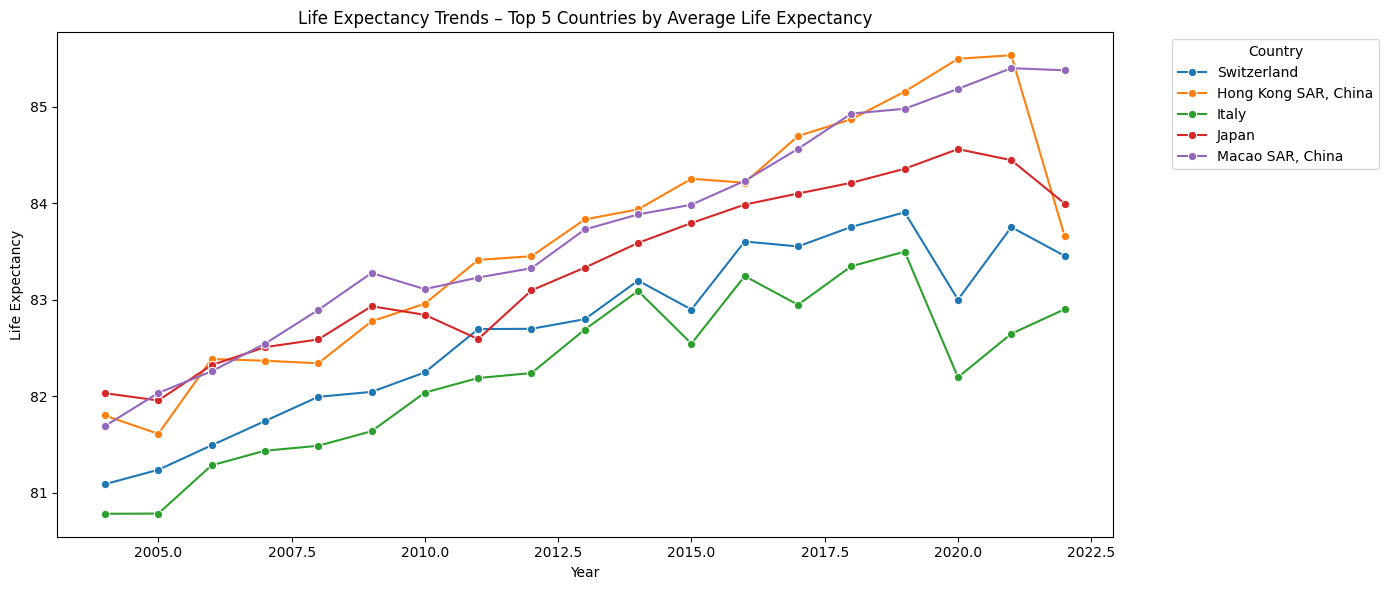

In [14]:
# Step 1: Calculate top 5 countries by average life expectancy
top5_lifeexp_countries = (
    df_core.groupby('Country Name')['Life Expectancy']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Step 2: Filter data for only these countries and years from 2004 to 2022
df_top5_lifeexp = df_core[
    (df_core['Country Name'].isin(top5_lifeexp_countries)) &
    (df_core['Year'].between(2004, 2022))
]

# Step 3: Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top5_lifeexp, x='Year', y='Life Expectancy', hue='Country Name', marker='o')
plt.title("Life Expectancy Trends – Top 5 Countries by Average Life Expectancy")
plt.xlabel("Year")
plt.ylabel("Life Expectancy")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This graph shows a steady rise in life expectancy from 2004 to 2019 across all top 5 countries, with Hong Kong SAR, China and Macao SAR, China consistently leading. A noticeable dip occurs after 2019, especially for Hong Kong SAR, China and Japan, likely reflecting the impact of the COVID-19 pandemic. Despite fluctuations, overall trends remain positive over the long term.

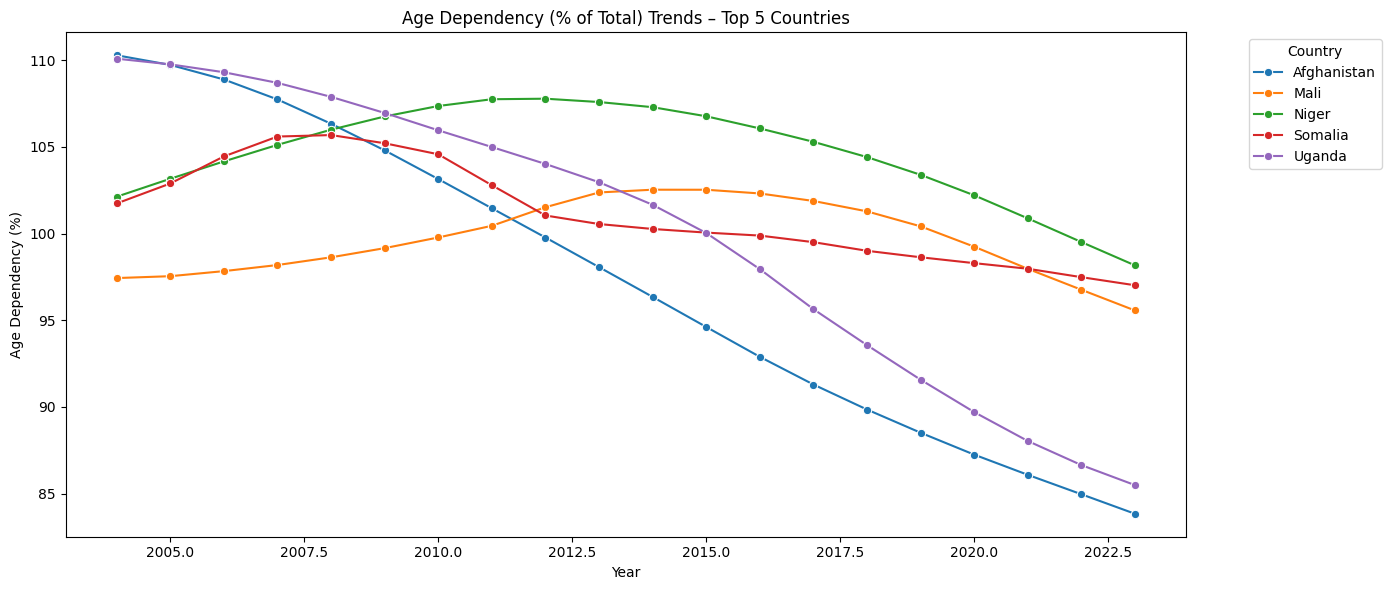

In [15]:
# Step 1: Get top 5 countries by average aging population
top5_aging_countries = (
    df_core.groupby('Country Name')['Age Dependency']
    .mean()
    .sort_values(ascending=False)
    .head(5)
    .index
)

# Step 2: Filter data
df_top5_aging = df_core[df_core['Country Name'].isin(top5_aging_countries)]

# Step 3: Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top5_aging, x='Year', y='Age Dependency', hue='Country Name', marker='o')
plt.title("Age Dependency (% of Total) Trends – Top 5 Countries")
plt.xlabel("Year")
plt.ylabel("Age Dependency (%)")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


The plot reveals a general declining trend in age dependency for most of the top 5 countries shown, suggesting a decreasing proportion of dependents (young and old) relative to the working-age population. Afghanistan exhibits the steepest decline, moving from the highest to the lowest dependency ratio by 2022. Conversely, Mali shows an initial increase and then a slower decline, maintaining a relatively high dependency ratio throughout the period, indicating ongoing demographic challenges.

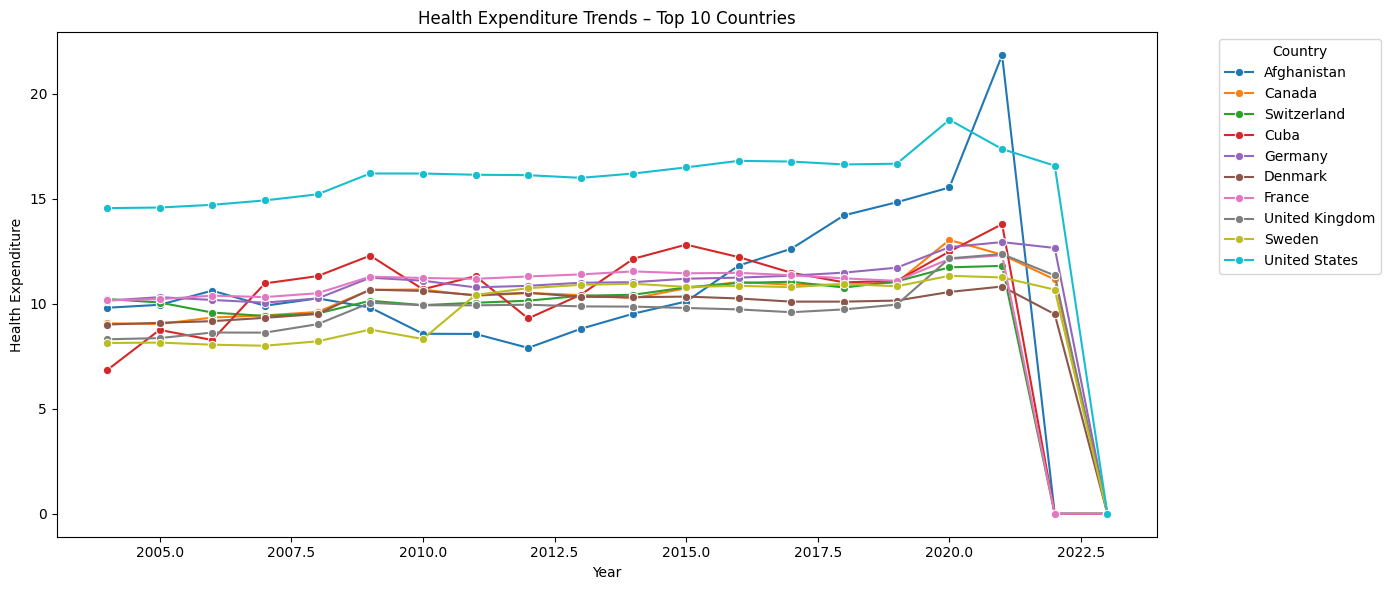

In [16]:
# Get top 10 countries by average health expenditure
top10_health_countries = (
    df_core.groupby('Country Name')['Health Expenditure']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter data
df_top10_health = df_core[df_core['Country Name'].isin(top10_health_countries)]

#Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top10_health, x='Year', y='Health Expenditure', hue='Country Name', marker='o')
plt.title("Health Expenditure Trends – Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("Health Expenditure")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


This graph reveals that the United States consistently spends the most on health, with expenditures rising steadily and peaking in 2021. Afghanistan shows an unusual spike in 2021, possibly due to emergency spending, followed by a sharp drop. Most countries maintain stable or gradually increasing health expenditures until 2021, after which there is a dramatic decline across all, likely due to post-COVID adjustments in 2022–23.

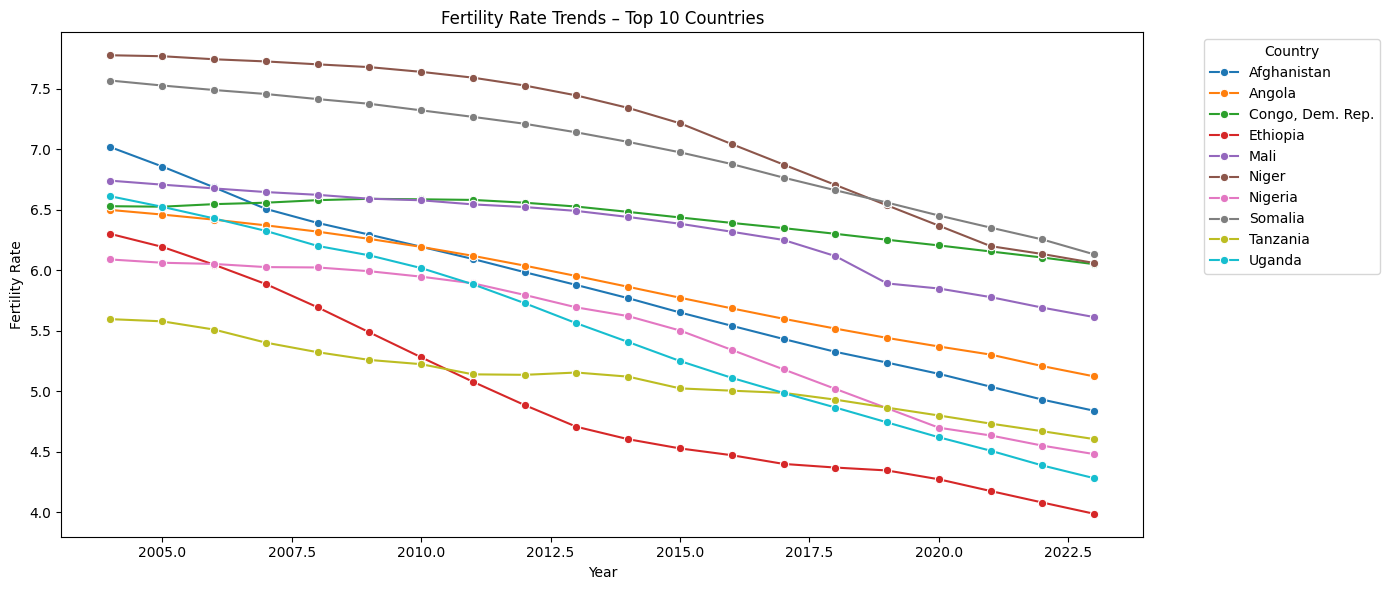

In [17]:
# Get top 10 countries by average fertility rate
top10_fertilityrate_countries = (
    df_core.groupby('Country Name')['Fertility Rate']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter data
df_top10_fertilityrate = df_core[df_core['Country Name'].isin(top10_fertilityrate_countries)]

#Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top10_fertilityrate, x='Year', y='Fertility Rate', hue='Country Name', marker='o')
plt.title("Fertility Rate Trends – Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("Fertility Rate")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

The fertility rate in the top 10 high-fertility countries has steadily declined from 2004 to 2023. Niger continues to have the highest rate, though it is decreasing. Ethiopia shows the sharpest drop, indicating rapid demographic transition. Most countries show gradual improvements due to better healthcare and family planning access.

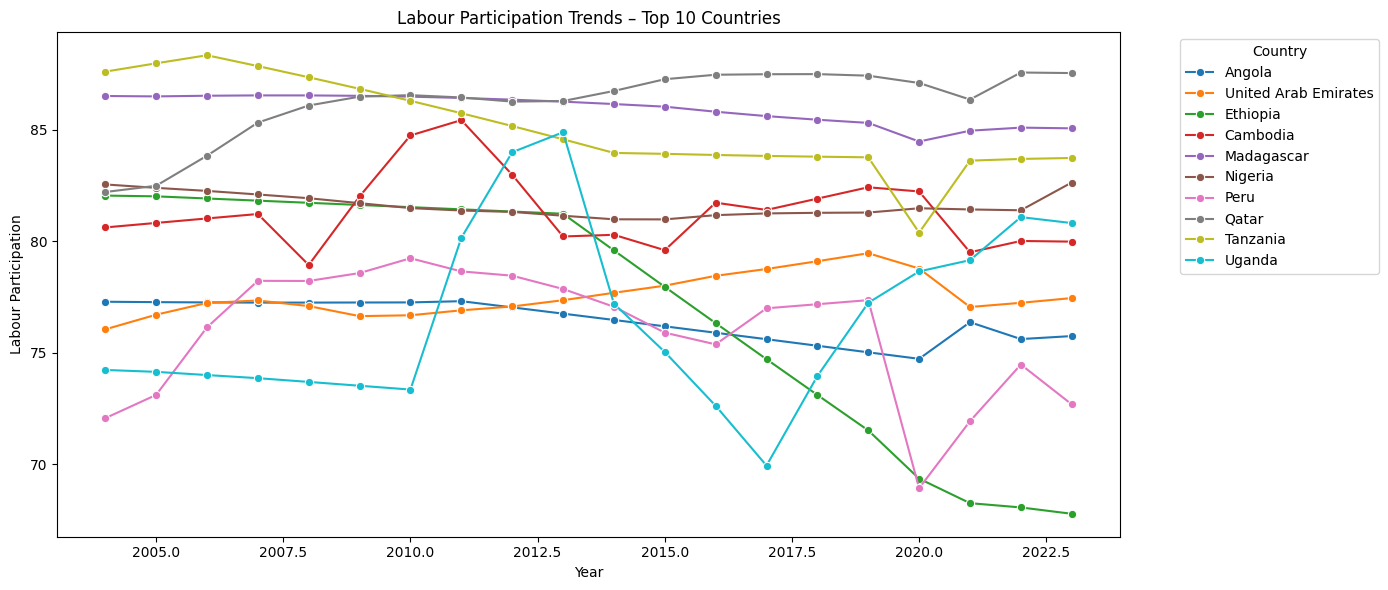

In [18]:
top10_labourpart_countries = (
    df_core.groupby('Country Name')['Labour Participation']
    .mean()
    .sort_values(ascending=False)
    .head(10)
    .index
)

# Filter data
df_top10_labourpart = df_core[df_core['Country Name'].isin(top10_labourpart_countries)]

#Plot
plt.figure(figsize=(14, 6))
sns.lineplot(data=df_top10_labourpart, x='Year', y='Labour Participation', hue='Country Name', marker='o')
plt.title("Labour Participation Trends – Top 10 Countries")
plt.xlabel("Year")
plt.ylabel("Labour Participation")
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

Labour participation rates exhibit mixed trends across the top 10 countries from 2004 to 2023. Madagascar and Qatar consistently maintained high levels above 85%, reflecting strong workforce engagement. Ethiopia, in contrast, experienced a marked decline from above 80% to under 70%.

Uganda showed sharp volatility, with rapid growth between 2010 and 2013 followed by a significant drop and partial recovery. Similarly, Cambodia peaked around 2010 but saw a downward trend afterward. These shifts suggest that while most countries maintained relative stability, some economies were more exposed to labour market shocks or demographic transitions, especially between 2015 and 2020.

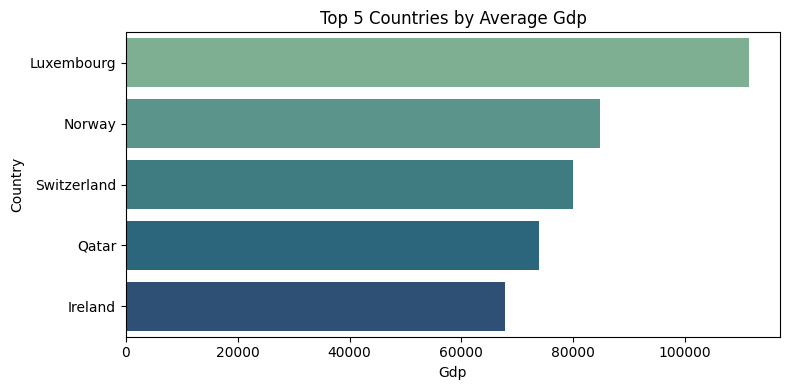

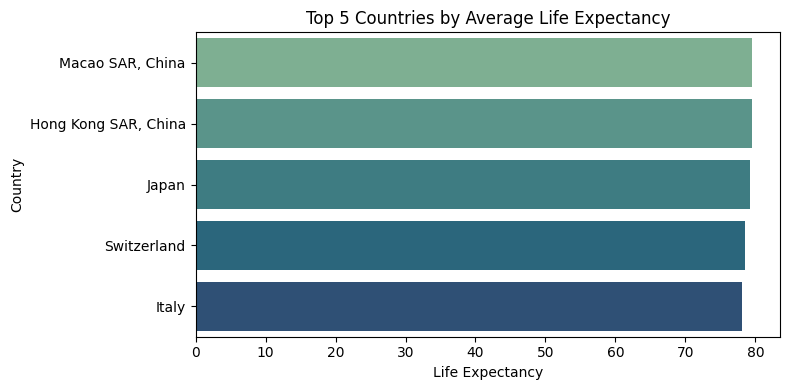

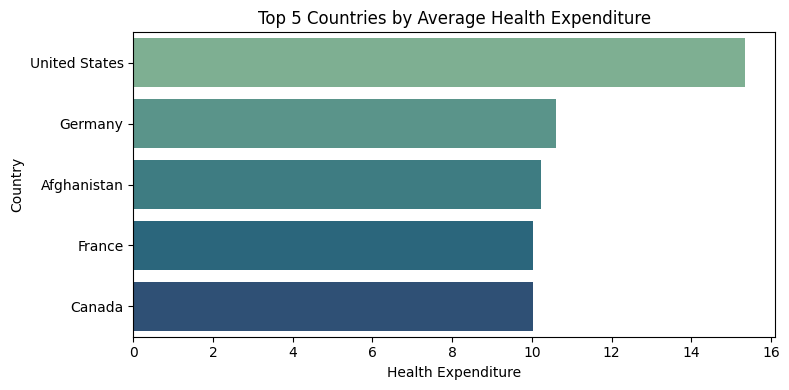

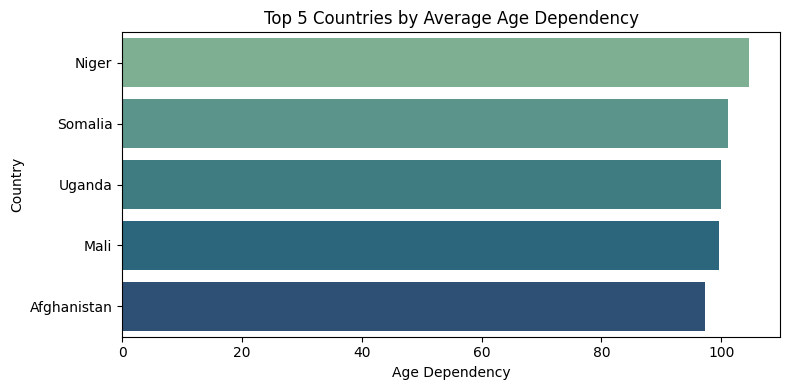

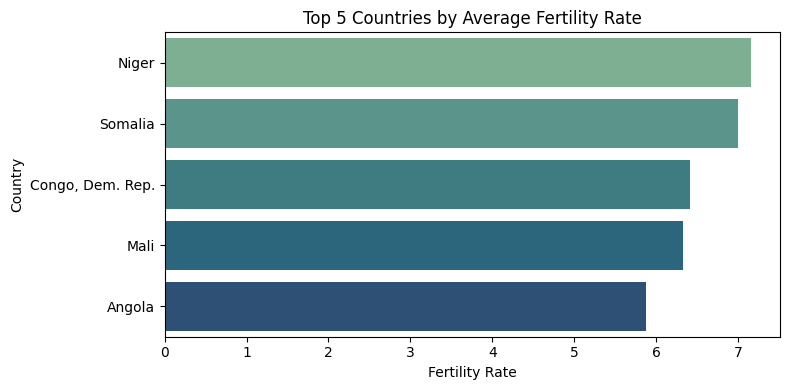

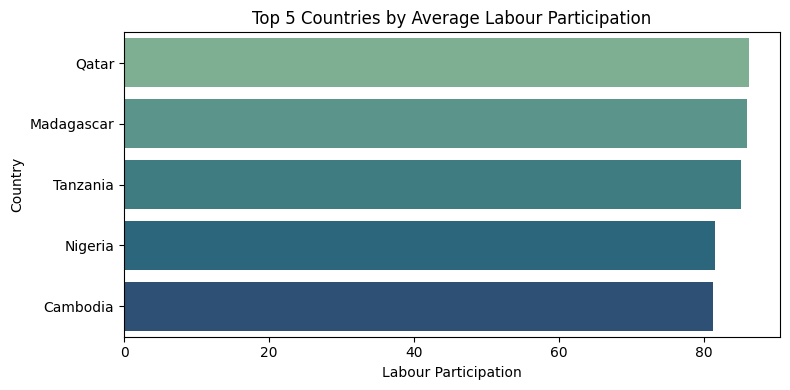

In [19]:
features = ['GDP', 'Life Expectancy', 'Health Expenditure', 'Age Dependency','Fertility Rate', 'Labour Participation']

for feature in features:
    top_countries = df_core.groupby('Country Name')[feature].mean().sort_values(ascending=False).head(5)
    
    plt.figure(figsize=(8, 4))
    sns.barplot(
        x=top_countries.values,
        y=top_countries.index,
        hue=top_countries.index,  # use y as dummy hue
        palette='crest',
        legend=False
    )
    
    plt.title(f"Top 5 Countries by Average {feature.replace('_', ' ').title()}")
    plt.xlabel(feature.replace('_', ' ').title())
    plt.ylabel("Country")
    plt.tight_layout()
    plt.show()


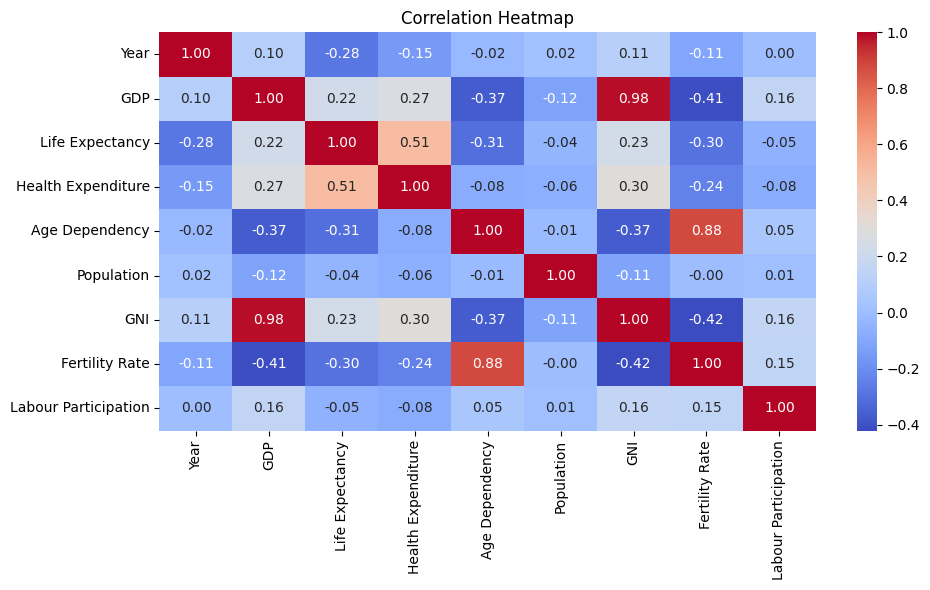

In [20]:
corr = df_core[numeric_cols].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()


Fertility rate and age dependency are strongly positively correlated (0.88) – higher fertility leads to more young dependents, which increases the dependency ratio.

Life expectancy and health expenditure have a moderate positive correlation (0.51) – suggesting better health investment is associated with longer lifespans.

Fertility rate is negatively correlated with GDP (-0.41) – indicating that wealthier countries tend to have lower fertility rates, aligning with demographic transition theory.

## Feature Engineering

In [21]:
#Total Health Expenditure
df_core['Total_Health_Expenditure'] = (df_core['Health Expenditure'] / 100) * df_core['GDP']

In [22]:
# health expenditure per capita
df_core['health_exp_per_capita'] = df_core['Health Expenditure'] / df_core['Population']


In [23]:
#categorical bins from dependency ratio
df_core['dependency_category'] = pd.cut(df_core['Age Dependency'], 
                                             bins=[0, 30, 50, 80, 120],
                                             labels=['Low', 'Moderate', 'High', 'Very High'])


In [24]:
# Binning life expectancy into categories
df_core['life_expectancy_group'] = pd.cut(df_core['Life Expectancy'], 
                                               bins=[0, 60, 70, 80, 90, 100],
                                               labels=['<60', '60-70', '70-80', '80-90', '>90'])


In [25]:
# Assuming data is sorted by Year for each country
df_core['GDP_Growth'] = df_core.groupby('Country Name')['GDP'].pct_change() * 100


In [26]:
df_core['log_gdp'] = np.log(df_core['GDP'] + 1)
df_core['log_health_expenditure'] = np.log(df_core['Health Expenditure'] + 1)


In [27]:
df_core['dep_ratioexp_interaction'] = df_core['Age Dependency'] * df_core['Life Expectancy']


In [28]:
# year_dummies = pd.get_dummies(df_core['Year'], prefix='Year', drop_first=True)
# df_core = pd.concat([df_core, year_dummies], axis=1)


In [29]:
# Step 1: Estimate working-age population (15–64)
df_core['Pop_15_64'] = df_core['Population'] / (1 + df_core['Age Dependency'])

# Step 2: Estimate dependent population
df_core['Pop_Dependent'] = df_core['Population'] - df_core['Pop_15_64']

# Step 3: Assume 60% of dependents are youth (0–14), 40% are elderly (65+)
df_core['Pop_0_14'] = df_core['Pop_Dependent'] * 0.6
df_core['Pop_65_plus'] = df_core['Pop_Dependent'] * 0.4


# Now use these to compute dependency ratios
df_core['YouthDependencyRatio'] = df_core['Pop_0_14'] / df_core['Pop_15_64']
df_core['OldAgeDependencyRatio'] = df_core['Pop_65_plus'] / df_core['Pop_15_64']
df_core['TotalDependencyRatio'] = df_core['YouthDependencyRatio'] + df_core['OldAgeDependencyRatio']
df_core['AgingIndex'] = df_core['Pop_65_plus'] / df_core['Pop_0_14']

In [30]:
df_core['Share_0_14'] = df_core['Pop_0_14'] / df_core['Population']
df_core['Share_15_64'] = df_core['Pop_15_64'] / df_core['Population']
df_core['Share_65_plus'] = df_core['Pop_65_plus'] / df_core['Population']


In [31]:
df_core['LifeExp_x_AgingIndex'] = df_core['Life Expectancy'] * df_core['AgingIndex']
df_core['HealthExp_x_OldDepRatio'] = df_core['Health Expenditure'] * df_core['OldAgeDependencyRatio']


In [32]:
def classify_income_group_binary(GNI):
    if GNI >= 12236:  # 2024 World Bank threshold for High income
        return 'High income'
    else:
        return 'Low income'

df_core['IncomeGroup'] = df_core['GNI'].apply(classify_income_group_binary)


In [33]:
df_core

Country Name  Year          GDP  Life Expectancy  Health Expenditure  \
0     Afghanistan  2004   221.763654           57.944            9.808474   
1     Afghanistan  2005   254.184249           58.361            9.948289   
2     Afghanistan  2006   274.218554           58.684           10.622766   
3     Afghanistan  2007   376.223152           59.111            9.904675   
4     Afghanistan  2008   381.733238           59.852           10.256495   
...           ...   ...          ...              ...                 ...   
2174     Zimbabwe  2019  1684.027904           61.292            3.232802   
2175     Zimbabwe  2020  1730.413489           61.124            2.954401   
2176     Zimbabwe  2021  1724.387731           59.253            2.789751   
2177     Zimbabwe  2022  2040.552459           59.391            0.000000   
2178     Zimbabwe  2023  2156.034004            0.000            0.000000   

      Age Dependency  Population     GNI  Fertility Rate  \
0         110.285308    23560654   210.0           7.018   
1         109.728525    24404567   250.0           6.858   
2         108.889135    25424094   270.0           6.686   
3         107.737251    25909852   330.0           6.508   
4         106.334376    26482622   370.0           6.392   
...              ...         ...     ...             ...   
2174       85.447906    15271368  2170.0           3.748   
2175       84.384381    15526888  1690.0           3.754   
2176       83.384953    15797210  1740.0           3.765   
2177       82.547605    16069056  1960.0           3.767   
2178       81.625352    16340822  2060.0           3.724   

      Labour Participation  ...  YouthDependencyRatio  OldAgeDependencyRatio  \
0                   46.507  ...             66.171185              44.114123   
1                   46.532  ...             65.837115              43.891410   
2                   46.570  ...             65.333481              43.555654   
3                   46.621  ...             64.642350              43.094900   
4                   46.680  ...             63.800625              42.533750   
...                    ...  ...                   ...                    ...   
2174                65.795  ...             51.268743              34.179162   
2175                64.763  ...             50.630628              33.753752   
2176                65.398  ...             50.030972              33.353981   
2177                65.214  ...             49.528563              33.019042   
2178                65.001  ...             48.975211              32.650141   

     TotalDependencyRatio AgingIndex  Share_0_14  Share_15_64  Share_65_plus  \
0              110.285308   0.666667    0.594608     0.008986       0.396406   
1              109.728525   0.666667    0.594581     0.009031       0.396388   
2              108.889135   0.666667    0.594540     0.009100       0.396360   
3              107.737251   0.666667    0.594482     0.009196       0.396321   
4              106.334376   0.666667    0.594410     0.009317       0.396273   
...                   ...        ...         ...          ...            ...   
2174            85.447906   0.666667    0.593059     0.011568       0.395373   
2175            84.384381   0.666667    0.592973     0.011712       0.395315   
2176            83.384953   0.666667    0.592890     0.011850       0.395260   
2177            82.547605   0.666667    0.592818     0.011969       0.395212   
2178            81.625352   0.666667    0.592738     0.012103       0.395159   

      LifeExp_x_AgingIndex  HealthExp_x_OldDepRatio  IncomeGroup  
0                38.629333               432.692212   Low income  
1                38.907333               436.644430   Low income  
2                39.122667               462.681501   Low income  
3                39.407333               426.840961   Low income  
4                39.901333               436.247217   Low income  
...                    ...         

## MODELLING

We implemented a combination of econometric and machine learning models to analyze our panel dataset, ensuring both interpretability and predictive strength:

Multiple Linear Regression (MLR) was used as a baseline model to capture linear relationships between predictors and the dependent variable. While MLR is simple and interpretable, it does not account for unobserved heterogeneity across countries or over time.

Fixed Effects (FE) models were employed to control for unobserved time-invariant country-specific effects, which might otherwise bias coefficient estimates. This model assumes that such individual effects are correlated with the explanatory variables.

Random Effects (RE) models were also used under the assumption that unobserved individual effects are uncorrelated with regressors.

To determine whether FE or RE was more appropriate, we conducted the Hausman test, which tests for systematic differences in coefficient estimates. Based on the test results, we selected the model accordingly.

In addition to econometric modeling, we integrated XGBoost, a gradient boosting algorithm, to enhance predictive accuracy and capture potential nonlinearities and interactions that traditional models might miss.

Finally, we applied LSTM (Long Short-Term Memory) neural networks to model temporal dependencies in the data and explore the dynamics in a more flexible, deep learning framework.

This mixed-methods approach improves both robustness of inference and accuracy of predictions, balancing econometric theory with modern machine learning capabilities.



Q1. How does increasing life expectancy impact the dependency ratio in low income and high income countries?


In [34]:
# Find GDP rows that are zero or negative
invalid_gdp = df_core[df_core['GDP'] <= 0]
print(invalid_gdp[['Country Name', 'Year', 'GDP']])


    Country Name  Year  GDP
358       Bhutan  2023  0.0
516         Cuba  2021  0.0
517         Cuba  2022  0.0
518         Cuba  2023  0.0


In [35]:
df_core = df_core[df_core['GDP'] > 0]
df_core.loc[:, 'log_gdp_per_capita'] = np.log(df_core['GDP'])



C:\Users\dell1\AppData\Local\Temp\ipykernel_14960\351250902.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_core.loc[:, 'log_gdp_per_capita'] = np.log(df_core['GDP'])


In [36]:
import statsmodels.api as sm

# Reset index for MLR (not panel structure)
df_model = df_core.copy()
#df_mlr = df_model.reset_index()
df_model = df_model.rename(columns={
    'Age Dependency': 'age_dependency',
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation'
})
df_model['log_gdp_per_capita'] = np.log(df_model['GDP'])
df_mlr = df_model.reset_index()
# Select features and target
features = ['life_expectancy', 'log_gdp_per_capita', 'fertility_rate', 'labour_participation']
target = 'age_dependency'

# Drop missing values in selected columns
df_mlr_clean = df_mlr[features + [target]].dropna()

# Define X and y
X = df_mlr_clean[features]
y = df_mlr_clean[target]

# Add constant
X = sm.add_constant(X)

# Fit the OLS model
mlr_model = sm.OLS(y, X).fit()


In [37]:
def run_mlr_by_income_group(df, income_group_label):
    df_group = df[df['IncomeGroup'] == income_group_label].reset_index()
    df_group_clean = df_group[features + [target]].dropna()

    X = df_group_clean[features]
    y = df_group_clean[target]
    X = sm.add_constant(X)

    model = sm.OLS(y, X).fit()
    print(f"\nMultiple Linear Regression – {income_group_label}:\n")
    print(model.summary())

# Run for both groups
run_mlr_by_income_group(df_model, 'High income')
run_mlr_by_income_group(df_model, 'Low income')



Multiple Linear Regression – High income:

                            OLS Regression Results                            
Dep. Variable:         age_dependency   R-squared:                       0.399
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     150.9
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           5.39e-99
Time:                        10:47:44   Log-Likelihood:                -3173.8
No. Observations:                 915   AIC:                             6358.
Df Residuals:                     910   BIC:                             6382.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

**High-Income Countries**

Model explains ~40% of the variance in age dependency ratio (R² = 0.399).

Significant predictors:

Life Expectancy (negative effect): A 1-year increase in life expectancy reduces age dependency by ~0.05 units.

Fertility Rate (positive): Each unit increase leads to a ~5.1 unit rise in age dependency.

Labour Participation (negative): Strong negative influence, indicating greater workforce participation reduces dependency.

Log GDP per Capita (positive): Surprisingly, higher income per capita is linked to higher age dependency, possibly due to aging populations.

Note: High condition number (1990) suggests possible multicollinearity.

**Low-Income Countries**

Exceptionally strong model with R² = 0.929.

Fertility rate dominates: a 1-unit increase causes a ~10.5 unit rise in age dependency.

Log GDP per Capita and life expectancy are both negatively associated with age dependency, supporting demographic transition theory.

Labour participation shows a small but significant positive effect.

In [38]:
import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS

# Create a copy of df_core for df_model
df_model = df_core.copy()

# Rename columns to snake_case
df_model = df_model.rename(columns={
    'Age Dependency': 'age_dependency',
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation'
})

# Use df_model directly
df_model['log_gdp_per_capita'] = np.log(df_model['GDP'])

# Check for any non-positive GDP values before logging (optional safety check)
assert (df_model['GDP'] > 0).all(), "GDP per capita contains non-positive values!"

# Set panel index
df_model = df_model.set_index(['Country Name', 'Year'])

# Add constant (required for PanelOLS)
df_model['const'] = 1

# Split into high-income and low-income groups
high_income = df_model[df_model['IncomeGroup'] == 'High income']
low_income = df_model[df_model['IncomeGroup'] == 'Low income']

# Then use snake_case names in the formula
model_high = PanelOLS.from_formula(
    'age_dependency ~ 1 + life_expectancy + log_gdp_per_capita + fertility_rate + labour_participation + EntityEffects',
    data=high_income
)

results_high = model_high.fit()
print("\nHigh Income Countries:\n", results_high.summary)

# Model for Low-Income Countries
model_low = PanelOLS.from_formula(
    'age_dependency ~ 1 + life_expectancy + log_gdp_per_capita + fertility_rate + labour_participation + EntityEffects',
    data=low_income
)

results_low = model_low.fit()
print("\nLow Income Countries:\n", results_low.summary)



High Income Countries:
                           PanelOLS Estimation Summary                           
Dep. Variable:         age_dependency   R-squared:                        0.1591
Estimator:                   PanelOLS   R-squared (Between):              0.3123
No. Observations:                 915   R-squared (Within):               0.1591
Date:                Fri, Jul 25 2025   R-squared (Overall):              0.3026
Time:                        10:47:45   Log-likelihood                   -2304.3
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      40.452
Entities:                          56   P-value                           0.0000
Avg Obs:                       16.339   Distribution:                   F(4,855)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):             40.452
   


**High-Income**

Explains less variance (Within R² = 0.159) compared to MLR.

Fertility rate becomes statistically insignificant, suggesting variation is explained more by fixed characteristics (entity effects).

Labour participation and life expectancy remain significant, confirming their consistent roles.

**Low-Income**

Much better fit (Within R² = 0.5717).

Fertility rate and GDP per capita remain strong and significant.

Labour participation is borderline significant (p = 0.051), suggesting minor within-country effects

In [39]:
import pandas as pd
from linearmodels.panel import RandomEffects
import numpy as np

# Assuming df_model contains the necessary columns:
# 'log_gdp_per_capita', 'age_dependency', 'country', 'time', 'income_group'
df_model=df_core.copy()

df_model = df_model.rename(columns={
    'Age Dependency': 'age_dependency',
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation'
})
# Example for High-Income Countries:
high_income_df = df_model[df_model['IncomeGroup'] == 'High income']  # Filter high-income countries

# Ensure 'country' and 'time' are the indices for panel data
high_income_df = high_income_df.set_index(['Country Name', 'Year'])

# Random Effects Model for High-Income Countries (using log GDP only)
model_high_income = RandomEffects.from_formula('age_dependency ~ 1 + life_expectancy + log_gdp_per_capita + fertility_rate + labour_participation + EntityEffects', high_income_df)
results_high_income = model_high_income.fit()

print("Random Effects Model for High-Income Countries")
print(results_high_income.summary)

# Example for Low-Income Countries:
low_income_df = df_model[df_model['IncomeGroup'] == 'Low income']  # Filter low-income countries

# Ensure 'country' and 'time' are the indices for panel data
low_income_df = low_income_df.set_index(['Country Name', 'Year'])

# Random Effects Model for Low-Income Countries (using log GDP only)
model_low_income = RandomEffects.from_formula('age_dependency ~ 1 + life_expectancy + log_gdp_per_capita + fertility_rate + labour_participation + EntityEffects', low_income_df)
results_low_income = model_low_income.fit()

print("Random Effects Model for Low-Income Countries")
print(results_low_income.summary)


Random Effects Model for High-Income Countries
                        RandomEffects Estimation Summary                        
Dep. Variable:         age_dependency   R-squared:                        0.2851
Estimator:              RandomEffects   R-squared (Between):              0.3369
No. Observations:                 915   R-squared (Within):               0.1582
Date:                Fri, Jul 25 2025   R-squared (Overall):              0.3185
Time:                        10:47:46   Log-likelihood                   -2336.2
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      90.733
Entities:                          56   P-value                           0.0000
Avg Obs:                       16.339   Distribution:                   F(4,910)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust): 


**High-Income**

Intermediate fit (R² = 0.2851) between MLR and Fixed Effects.

Fertility rate becomes marginally significant (p = 0.077), implying effects vary across countries.

Labour participation and life expectancy retain strong significance.

**Low-Income**

High explanatory power (R² = 0.6884).

Fertility rate and log GDP per capita remain the dominant predictors.

Labour participation becomes insignificant, suggesting its impact is less stable over time or across entities.

In [40]:
import numpy as np
import pandas as pd

def hausman_test(fe_res, re_res):
    """
    Perform Hausman test manually given fixed effects and random effects model results.

    Parameters:
    - fe_res: Fitted result from PanelOLS (with EntityEffects)
    - re_res: Fitted result from RandomEffects

    Returns:
    - chi2_stat: The test statistic
    - p_value: p-value of the test
    """
    # Align parameters
    common_coef = list(set(fe_res.params.index).intersection(re_res.params.index))
    b_FE = fe_res.params[common_coef]
    b_RE = re_res.params[common_coef]
    v_FE = fe_res.cov.loc[common_coef, common_coef]
    v_RE = re_res.cov.loc[common_coef, common_coef]

    diff = b_FE - b_RE
    cov_diff = v_FE - v_RE

    # Chi-squared test statistic
    stat = np.dot(diff.T, np.linalg.inv(cov_diff)).dot(diff)
    dof = diff.shape[0]
    pval = 1 - stats.chi2.cdf(stat, dof)

    return stat, pval


In [41]:
from scipy import stats

# Prepare your data as before
df_model = df_core.copy()
df_model = df_model.rename(columns={
    'Age Dependency': 'age_dependency',
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation'
})
df_model['log_gdp_per_capita'] = np.log(df_model['GDP'])
df_model = df_model[df_model['GDP'] > 0]
df_model = df_model.set_index(['Country Name', 'Year'])

# High-Income countries
high_income_df = df_model[df_model['IncomeGroup'] == 'High income'].copy()

# Fit models
fe_model = PanelOLS.from_formula(
    'age_dependency ~ 1 + life_expectancy + log_gdp_per_capita + fertility_rate + labour_participation + EntityEffects',
    data=high_income_df
)
fe_res = fe_model.fit()

re_model = RandomEffects.from_formula(
    'age_dependency ~ 1 + life_expectancy + log_gdp_per_capita + fertility_rate + labour_participation',
    data=high_income_df
)
re_res = re_model.fit()

# Run Hausman test
stat, pval = hausman_test(fe_res, re_res)
print("\n=== Hausman Test (Manual) ===")
print(f"Chi-squared statistic: {stat:.4f}")
print(f"p-value: {pval:.4f}")

if pval < 0.05:
    print("→ Reject null → Fixed Effects is preferred.")
else:
    print("→ Fail to reject null → Random Effects is preferred.")



=== Hausman Test (Manual) ===
Chi-squared statistic: 9.1321
p-value: 0.1039
→ Fail to reject null → Random Effects is preferred.


In [42]:
# Filter Low-Income countries
low_income_df = df_model[df_model['IncomeGroup'] == 'Low income'].copy()

# Fit Fixed Effects model
fe_model_low = PanelOLS.from_formula(
    'age_dependency ~ 1 + life_expectancy + log_gdp_per_capita + fertility_rate + labour_participation + EntityEffects',
    data=low_income_df
)
fe_res_low = fe_model_low.fit()

# Fit Random Effects model
re_model_low = RandomEffects.from_formula(
    'age_dependency ~ 1 + life_expectancy + log_gdp_per_capita + fertility_rate + labour_participation',
    data=low_income_df
)
re_res_low = re_model_low.fit()

# Perform Hausman test
stat_low, pval_low = hausman_test(fe_res_low, re_res_low)

# Print results
print("\n=== Hausman Test for Low-Income Countries ===")
print(f"Chi-squared statistic: {stat_low:.4f}")
print(f"p-value: {pval_low:.4f}")

if pval_low < 0.05:
    print("→ Reject null → Fixed Effects is preferred.")
else:
    print("→ Fail to reject null → Random Effects is preferred.")



=== Hausman Test for Low-Income Countries ===
Chi-squared statistic: 16.7968
p-value: 0.0049
→ Reject null → Fixed Effects is preferred.


In [43]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Assuming 'df_model' is your dataset and contains the necessary columns:
# 'age_dependency', 'life_expectancy', 'fertility_rate', 'labour_participation', 'log_gdp_per_capita' (for high-income)
df_model=df_core.copy()

df_model = df_model.rename(columns={
    'Age Dependency': 'age_dependency',
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation'
})

# Filter the data for high-income and low-income countries separately
high_income_df = df_model[df_model['IncomeGroup'] == 'High income']
low_income_df = df_model[df_model['IncomeGroup'] == 'Low income']

# Define features and target variable for high-income countries
X_high_income = high_income_df[['life_expectancy', 'log_gdp_per_capita', 'fertility_rate', 'labour_participation']]
y_high_income = high_income_df['age_dependency']

# Define features and target variable for low-income countries
X_low_income = low_income_df[['life_expectancy', 'log_gdp_per_capita', 'fertility_rate', 'labour_participation']]
y_low_income = low_income_df['age_dependency']

# Split the data into training and testing sets
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high_income, y_high_income, test_size=0.2, random_state=42)
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low_income, y_low_income, test_size=0.2, random_state=42)

# Optionally scale the features (important for models like XGBoost)
scaler = StandardScaler()
X_train_high_scaled = scaler.fit_transform(X_train_high)
X_test_high_scaled = scaler.transform(X_test_high)

X_train_low_scaled = scaler.fit_transform(X_train_low)
X_test_low_scaled = scaler.transform(X_test_low)

# Define and train the XGBoost model for high-income countries
model_high = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
model_high.fit(X_train_high_scaled, y_train_high)

# Predict and evaluate for high-income countries
y_pred_high = model_high.predict(X_test_high_scaled)
mse_high = mean_squared_error(y_test_high, y_pred_high)
r2_high = r2_score(y_test_high, y_pred_high)

print("High-Income Countries - XGBoost Model Evaluation")
print(f"Mean Squared Error (MSE): {mse_high}")
print(f"R-squared: {r2_high}")

# Define and train the XGBoost model for low-income countries
model_low = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)
model_low.fit(X_train_low_scaled, y_train_low)

# Predict and evaluate for low-income countries
y_pred_low = model_low.predict(X_test_low_scaled)
mse_low = mean_squared_error(y_test_low, y_pred_low)
r2_low = r2_score(y_test_low, y_pred_low)

print("Low-Income Countries - XGBoost Model Evaluation")
print(f"Mean Squared Error (MSE): {mse_low}")
print(f"R-squared: {r2_low}")


High-Income Countries - XGBoost Model Evaluation
Mean Squared Error (MSE): 21.29481620835669
R-squared: 0.7420190222522991
Low-Income Countries - XGBoost Model Evaluation
Mean Squared Error (MSE): 7.134593307446461
R-squared: 0.97899083344557


In [44]:
# Split dataset into High-Income and Low-Income groups
high_income_df = df_model[df_model['IncomeGroup'] == 'High income']
low_income_df = df_model[df_model['IncomeGroup'] == 'Low income']

# Define features and targets for both groups
features = ['life_expectancy', 'fertility_rate', 'labour_participation', 'log_gdp_per_capita']
target = 'age_dependency'

X_high = high_income_df[features]
y_high = high_income_df[target]

X_low = low_income_df[features]
y_low = low_income_df[target]


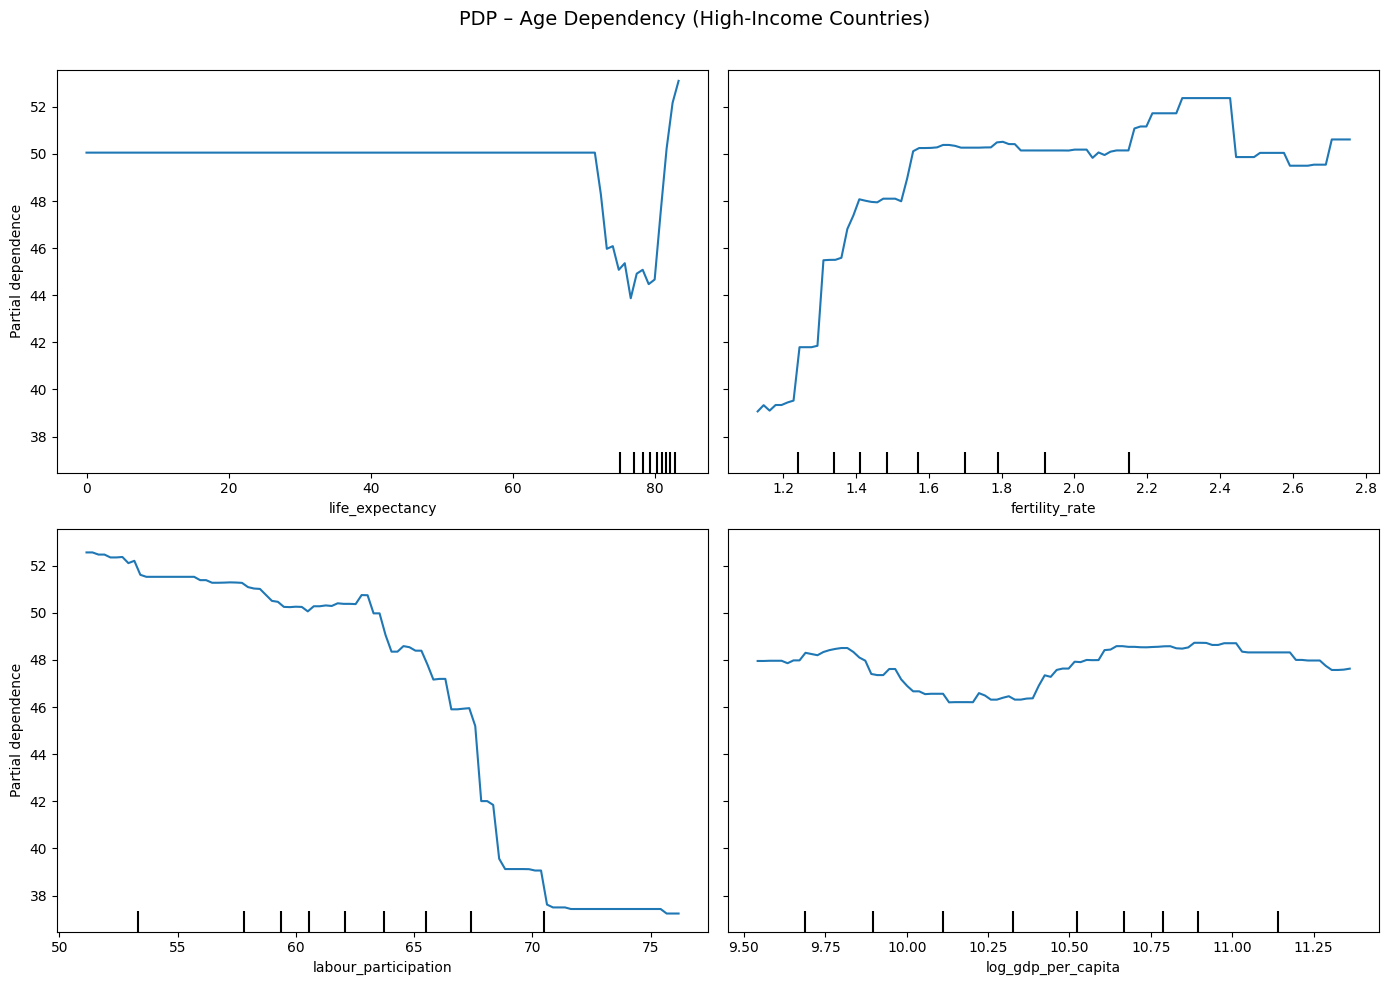

In [45]:
from xgboost import XGBRegressor, plot_importance
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Train model on high-income data
xgb_high = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_high.fit(X_high, y_high)

# PDP for high-income group
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
PartialDependenceDisplay.from_estimator(
    estimator=xgb_high,
    X=X_high,
    features=features,
    ax=ax,
    grid_resolution=100
)

plt.suptitle("PDP – Age Dependency (High-Income Countries)", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


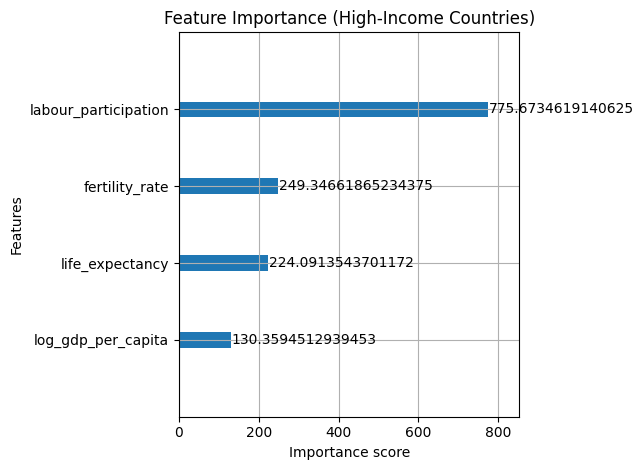

In [46]:
from xgboost import plot_importance
import matplotlib.pyplot as plt

# Plot feature importance for high-income XGBoost model
plot_importance(xgb_high, importance_type='gain', title='Feature Importance (High-Income Countries)')
plt.tight_layout()
plt.show()


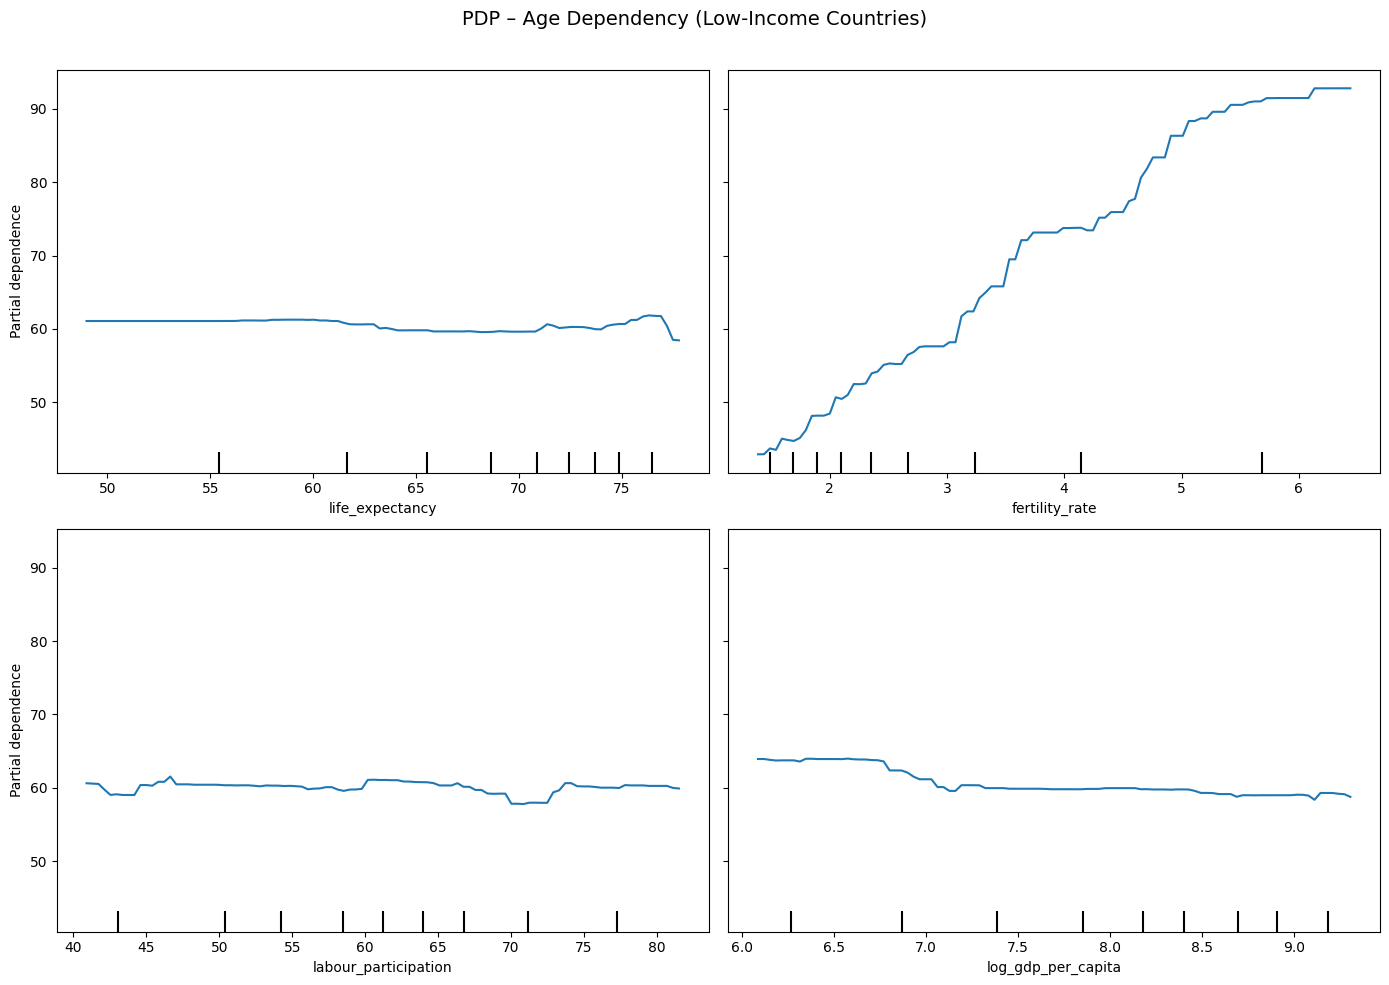

In [47]:
# Train model on low-income data
xgb_low = XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=4, random_state=42)
xgb_low.fit(X_low, y_low)

# PDP for low-income group
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))
PartialDependenceDisplay.from_estimator(
    estimator=xgb_low,
    X=X_low,
    features=features,
    ax=ax,
    grid_resolution=100
)

plt.suptitle("PDP – Age Dependency (Low-Income Countries)", fontsize=14)
plt.tight_layout()
plt.subplots_adjust(top=0.92)
plt.show()


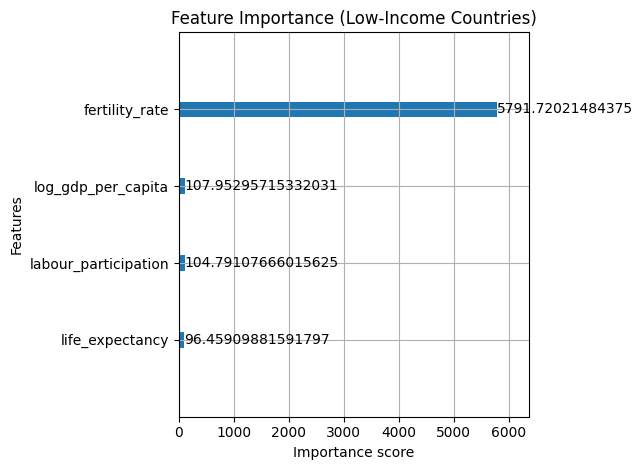

In [48]:
# Plot feature importance for low-income XGBoost model
plot_importance(xgb_low, importance_type='gain', title='Feature Importance (Low-Income Countries)')
plt.tight_layout()
plt.show()


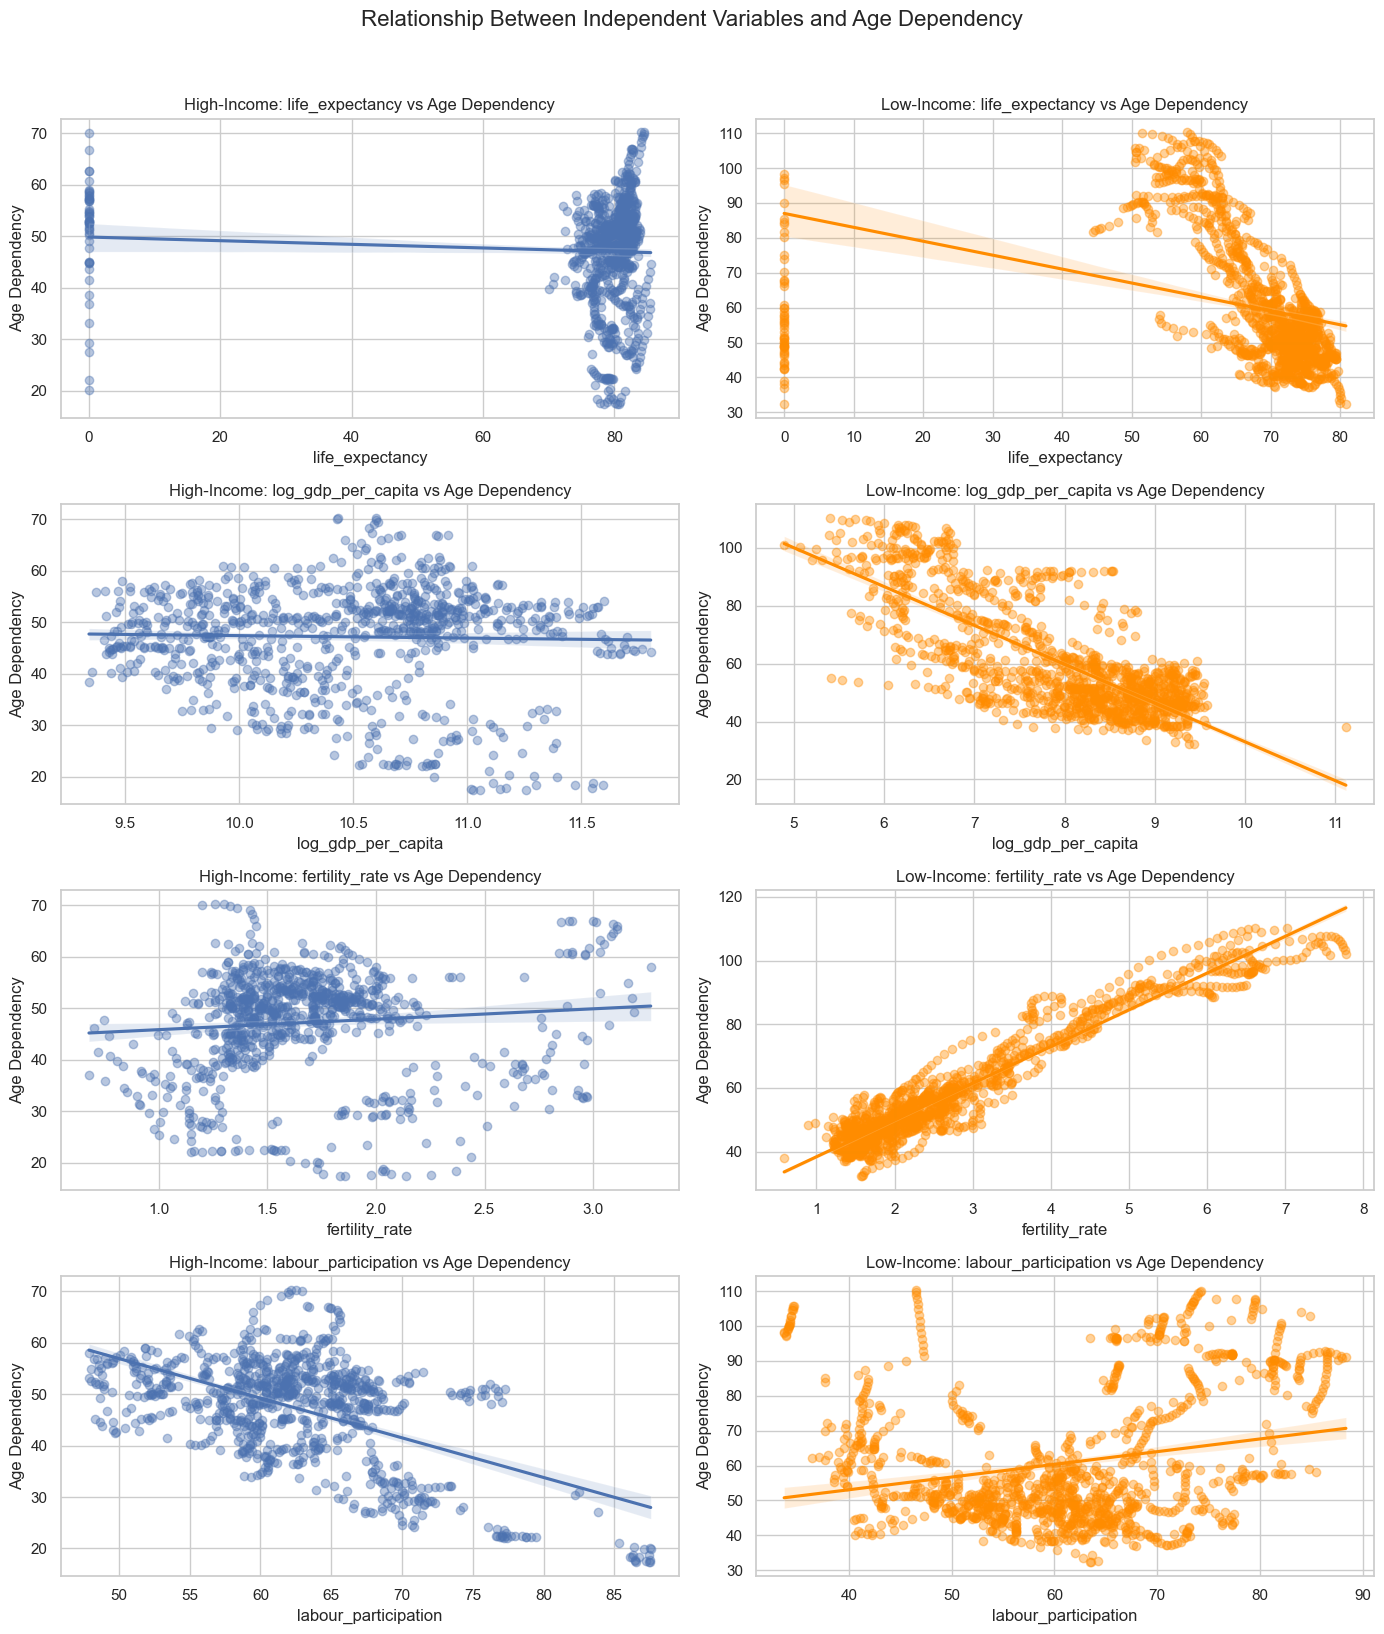

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set Seaborn theme
sns.set(style="whitegrid")

# List of features to visualize
features = ['life_expectancy', 'log_gdp_per_capita', 'fertility_rate', 'labour_participation']

# Create subplots
fig, axes = plt.subplots(len(features), 2, figsize=(14, 16))
fig.suptitle("Relationship Between Independent Variables and Age Dependency", fontsize=16, y=1.02)

# Loop through features and plot for both income groups
for i, feature in enumerate(features):
    # High-income
    sns.regplot(
        data=df_model[df_model['IncomeGroup'] == 'High income'],
        x=feature, y='age_dependency',
        ax=axes[i, 0], scatter_kws={'alpha':0.4}
    )
    axes[i, 0].set_title(f'High-Income: {feature} vs Age Dependency')
    axes[i, 0].set_ylabel('Age Dependency')

    # Low-income
    sns.regplot(
        data=df_model[df_model['IncomeGroup'] == 'Low income'],
        x=feature, y='age_dependency',
        ax=axes[i, 1], scatter_kws={'alpha':0.4},
        color='darkorange'
    )
    axes[i, 1].set_title(f'Low-Income: {feature} vs Age Dependency')
    axes[i, 1].set_ylabel('Age Dependency')

# Adjust layout
plt.tight_layout()
plt.show()


***High-Income Countries***
Life Expectancy:
No strong linear pattern is visible. Most data is tightly clustered around high life expectancy (~80), with flat or slightly declining trend, suggesting a limited impact on age dependency.

Log GDP per Capita:
Weak or no visible trend. Age dependency seems largely unaffected by income per capita within this group, possibly due to already aging populations and plateaued economic-demographic effects.

Fertility Rate:
A mild positive association is observed. Even small increases in fertility rate among high-income nations may lead to a modest rise in age dependency, due to a potential increase in younger dependents.

Labour Participation:
Shows a clear negative correlation — higher labour force participation is linked to lower age dependency, indicating the balancing effect of workforce engagement on dependency burden.

***Low-Income Countries***
Life Expectancy:
Strong negative relationship — as life expectancy rises, age dependency drops significantly. This reflects the shift toward healthier, more productive populations as basic health conditions improve.

Log GDP per Capita:
A strong negative trend is evident. As income increases, age dependency declines, supporting the idea that economic growth accompanies shifts toward smaller, more sustainable family structures.

Fertility Rate:
Strong positive linear relationship — higher fertility rates are directly associated with increased age dependency. This confirms that fertility is the primary driver of age dependency in developing economies.

Labour Participation:
The trend is less clear. Though a slight negative pattern exists, the scatter suggests other factors (e.g. informal labor markets, gender roles) may complicate the relationship in low-income contexts.

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score

# ---- Configuration ----
features = ['life_expectancy', 'fertility_rate', 'labour_participation', 'log_gdp_per_capita']
target = 'age_dependency'
seq_length = 5
future_steps = 5

# ---- Preprocessing ----
df_model = df_core.copy()
df_model['log_gdp_per_capita'] = np.log(df_model['GDP'])
df_model = df_model.rename(columns={
    'Age Dependency': 'age_dependency',
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation'
})
df_model = df_model.dropna(subset=features + [target])

# ---- Sequence Creator ----
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

# ---- Train LSTM ----
def run_lstm(df_group, group_name):
    grouped = df_group.groupby('Country Name')
    X_all, y_all, scalers = [], [], {}
    for name, group in grouped:
        group = group.sort_values('Year')
        if len(group) <= seq_length:
            continue
        scaler = MinMaxScaler()
        scaled = scaler.fit_transform(group[features + [target]])
        X, y = create_sequences(scaled, seq_length)
        X_all.append(X)
        y_all.append(y)
        scalers[name] = scaler

    if not X_all:
        return None, None, None, None
    X_all = np.concatenate(X_all)
    y_all = np.concatenate(y_all)

    split = int(0.8 * len(X_all))
    X_train, X_test = X_all[:split], X_all[split:]
    y_train, y_test = y_all[:split], y_all[split:]

    model = Sequential([
        LSTM(50, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=100, verbose=0)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{group_name} - RMSE: {rmse:.4f}, R2: {r2:.4f}")
    return y_test, y_pred, model, scalers

# ---- Split by income groups ----
df_full = df_model
df_high = df_model[df_model['IncomeGroup'] == 'High income']
df_low = df_model[df_model['IncomeGroup'] == 'Low income']

# ---- Run LSTM models ----
y_true_f, y_pred_f, model_full, scalers_full = run_lstm(df_full, "Full Dataset")
y_true_h, y_pred_h, model_high, scalers_high = run_lstm(df_high, "High Income")
y_true_l, y_pred_l, model_low, scalers_low = run_lstm(df_low, "Low Income")    

C:\Users\dell1\anaconda3\envs\tf_env\lib\site-packages\requests\__init__.py:86: RequestsDependencyWarning: Unable to find acceptable character detection dependency (chardet or charset_normalizer).
  warnings.warn(
C:\Users\dell1\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 32ms/step 
Full Dataset - RMSE: 0.3495, R2: -0.1190


C:\Users\dell1\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 66ms/step 
High Income - RMSE: 0.3971, R2: -0.3841


C:\Users\dell1\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step 
Low Income - RMSE: 0.3893, R2: -0.4593


In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import mean_squared_error, r2_score

# ---- Config ----
features = ['life_expectancy', 'fertility_rate', 'labour_participation', 'log_gdp_per_capita']
target = 'age_dependency'
seq_length = 5
use_gru = True  # 👈 Set to True if you want GRU, False for Bidirectional LSTM

# ---- Preprocessing ----
df_model = df_core.copy()
df_model['log_gdp_per_capita'] = np.log(df_model['GDP'])
df_model = df_model.rename(columns={
    'Age Dependency': 'age_dependency',
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation'
})
df_model = df_model.dropna(subset=features + [target])

# ---- Sequence creation ----
def create_sequences(X_data, y_data, seq_length):
    X, y = [], []
    for i in range(len(X_data) - seq_length):
        X.append(X_data[i:i+seq_length])
        y.append(y_data[i+seq_length])
    return np.array(X), np.array(y)

# ---- LSTM or GRU Runner ----
def run_sequence_model(df_group, group_name):
    grouped = df_group.groupby('Country Name')
    X_all, y_all = [], []

    for name, group in grouped:
        group = group.sort_values('Year')
        if len(group) <= seq_length:
            continue

        # Scaling
        scaler_X = MinMaxScaler()
        scaler_y = MinMaxScaler()
        X_scaled = scaler_X.fit_transform(group[features])
        y_scaled = scaler_y.fit_transform(group[[target]])

        X_seq, y_seq = create_sequences(X_scaled, y_scaled, seq_length)
        X_all.append(X_seq)
        y_all.append(y_seq)

    if not X_all:
        return None, None, None

    X_all = np.concatenate(X_all)
    y_all = np.concatenate(y_all)

    split = int(0.8 * len(X_all))
    X_train, X_test = X_all[:split], X_all[split:]
    y_train, y_test = y_all[:split], y_all[split:]

    # Model
    model = Sequential([Input(shape=(seq_length, X_train.shape[2]))])
    if use_gru:
        model.add(GRU(64, activation='tanh', return_sequences=True))
        model.add(GRU(32, activation='tanh'))
    else:
        model.add(Bidirectional(LSTM(64, activation='tanh', return_sequences=True)))
        model.add(Bidirectional(LSTM(32, activation='tanh')))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')

    # Train
    es = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    model.fit(X_train, y_train, validation_split=0.2, epochs=100, verbose=0, callbacks=[es])

    # Predict
    y_pred = model.predict(X_test)
    y_test_inv = scaler_y.inverse_transform(y_test.reshape(-1, 1))
    y_pred_inv = scaler_y.inverse_transform(y_pred)

    rmse = np.sqrt(mean_squared_error(y_test_inv, y_pred_inv))
    r2 = r2_score(y_test_inv, y_pred_inv)
    print(f"{group_name} - RMSE: {rmse:.4f}, R²: {r2:.4f}")

    return y_test_inv, y_pred_inv, model

# ---- Run for each group ----
df_full = df_model
df_high = df_model[df_model['IncomeGroup'] == 'High income']
df_low = df_model[df_model['IncomeGroup'] == 'Low income']

y_true_f, y_pred_f, model_f = run_sequence_model(df_full, "Full Dataset")
y_true_h, y_pred_h, model_h = run_sequence_model(df_high, "High Income")
y_true_l, y_pred_l, model_l = run_sequence_model(df_low, "Low Income")


11/11 ━━━━━━━━━━━━━━━━━━━━ 1s 69ms/step 
Full Dataset - RMSE: 2.4645, R²: -0.0386
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 158ms/step
High Income - RMSE: 1.5142, R²: -0.0961
6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 108ms/step
Low Income - RMSE: 2.5777, R²: -0.1945


Q2. What is the relationship between life expectancy and healthcare costs in both the income groups?

In [52]:
import statsmodels.api as sm

# Make a clean copy and reset index
df_model=df_core.copy()
df_model['log_gdp_per_capita'] = np.log(df_model['GDP'])

df_model = df_model.rename(columns={
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation',
    'Health Expenditure': 'health_expenditure'
})

df_mlr = df_model.reset_index()

# Ensure GDP is numeric and positive
df_mlr['GDP'] = pd.to_numeric(df_mlr['GDP'], errors='coerce')
df_mlr = df_mlr[df_mlr['GDP'] > 0]

# Log-transform safely
df_mlr['log_gdp_per_capita'] = np.log(df_mlr['GDP'])

# Drop rows with missing values in relevant columns
cols_needed = ['health_expenditure', 'life_expectancy', 'log_gdp_per_capita', 'fertility_rate', 'IncomeGroup']
df_mlr = df_mlr[cols_needed].dropna()

# Function to run MLR for each income group
def run_mlr_by_income(df, income_group_label):
    subset = df[df['IncomeGroup'] == income_group_label]
    
    X = subset[['life_expectancy', 'log_gdp_per_capita', 'fertility_rate']]
    y = subset['health_expenditure']
    
    # Add constant term
    X = sm.add_constant(X)
    
    # Fit model
    model = sm.OLS(y, X).fit()
    
    print(f"\nMultiple Linear Regression – {income_group_label} Countries:\n")
    print(model.summary())

# Run for both income groups
run_mlr_by_income(df_mlr, 'Low income')
run_mlr_by_income(df_mlr, 'High income')



Multiple Linear Regression – Low income Countries:

                            OLS Regression Results                            
Dep. Variable:     health_expenditure   R-squared:                       0.222
Model:                            OLS   Adj. R-squared:                  0.221
Method:                 Least Squares   F-statistic:                     119.7
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           3.31e-68
Time:                        10:51:06   Log-Likelihood:                -2895.0
No. Observations:                1260   AIC:                             5798.
Df Residuals:                    1256   BIC:                             5819.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

***Multiple Linear Regression (OLS)***
**High-Income Countries:**

Life expectancy is a strong positive predictor of health expenditure (p < 0.001).

Log GDP per capita also contributes significantly, suggesting that wealthier countries spend more on health.

Fertility rate shows no significant impact, indicating that demographic burden is less influential in wealthier nations.

**Low-Income Countries:**

Life expectancy again emerges as a significant driver (p < 0.001), implying better health correlates with more spending.

GDP per capita and fertility rate do not show significant influence in the OLS model, potentially due to limited public health spending capacity.

In [53]:
import pandas as pd
import numpy as np
from linearmodels.panel import PanelOLS

# Ensure log GDP column exists
df_model=df_core.copy()
df_model['log_gdp_per_capita'] = np.log(df_model['GDP'])

# Rename for consistency
df_model = df_model.rename(columns={
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation',
    'Health Expenditure': 'health_expenditure'
})

# Set panel index
df_model = df_model.set_index(['Country Name', 'Year'])

# Filter by income group
df_low = df_model[df_model['IncomeGroup'] == 'Low income']
df_high = df_model[df_model['IncomeGroup'] == 'High income']

# Fixed Effects Model for Low-Income Countries
model_low = PanelOLS.from_formula(
    'health_expenditure ~ 1 + life_expectancy + log_gdp_per_capita + fertility_rate + EntityEffects',
    data=df_low
)
results_low = model_low.fit()
print("Fixed Effects - Low-Income Countries")
print(results_low.summary)

# Fixed Effects Model for High-Income Countries
model_high = PanelOLS.from_formula(
    'health_expenditure ~ 1 + life_expectancy + log_gdp_per_capita + fertility_rate + EntityEffects',
    data=df_high
)
results_high = model_high.fit()
print("\nFixed Effects - High-Income Countries")
print(results_high.summary)


Fixed Effects - Low-Income Countries
                          PanelOLS Estimation Summary                           
Dep. Variable:     health_expenditure   R-squared:                        0.2989
Estimator:                   PanelOLS   R-squared (Between):             -0.3731
No. Observations:                1260   R-squared (Within):               0.2989
Date:                Fri, Jul 25 2025   R-squared (Overall):             -0.0990
Time:                        10:51:06   Log-likelihood                   -2362.6
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      168.28
Entities:                          73   P-value                           0.0000
Avg Obs:                       17.260   Distribution:                  F(3,1184)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):           

***Fixed Effects (PanelOLS)***
**High-Income Countries:**

The model explains ~50% of within-country variation (R² = 0.50).

Life expectancy is consistently a strong positive factor, but log GDP per capita now shows a negative effect, possibly due to saturation or nonlinear scaling in wealthier contexts.

Fertility rate remains statistically insignificant.

**Low-Income Countries:**

Within-country variation explained is modest (R² = 0.30), but the model is statistically significant overall.

Both life expectancy and fertility rate are significant, with fertility rate positively associated — possibly reflecting high public health costs tied to childbearing and dependency.

GDP per capita remains non-significant, highlighting weak fiscal impact at low income levels.



In [54]:
from linearmodels.panel import RandomEffects
import pandas as pd

# High-Income Countries Model
df_model=df_core.copy()
df_model = df_model.rename(columns={
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation',
    'Health Expenditure': 'health_expenditure'
})
high_income_df = df_model[df_model['IncomeGroup'] == 'High income']

# Set the multi-index: Country and Time (or any entity & time columns you have)
high_income_df = high_income_df.set_index(['Country Name', 'Year'])

# Define the model
model_high_income = RandomEffects.from_formula('health_expenditure ~ life_expectancy + log_gdp_per_capita + fertility_rate + labour_participation + EntityEffects', data=high_income_df)

# Fit the model
results_high_income = model_high_income.fit()

# Output the results for High-Income countries
print("Random Effects Model for High-Income Countries")
print(results_high_income.summary)

# Low-Income Countries Model
low_income_df = df_model[df_model['IncomeGroup'] == 'Low income']

# Set the multi-index: Country and Time (or any entity & time columns you have)
low_income_df = low_income_df.set_index(['Country Name', 'Year'])

# Define the model
model_low_income = RandomEffects.from_formula('health_expenditure ~ life_expectancy + log_gdp_per_capita + fertility_rate + labour_participation + EntityEffects', data=low_income_df)

# Fit the model
results_low_income = model_low_income.fit()

# Output the results for Low-Income countries
print("\nRandom Effects Model for Low-Income Countries")
print(results_low_income.summary)


Random Effects Model for High-Income Countries
                        RandomEffects Estimation Summary                        
Dep. Variable:     health_expenditure   R-squared:                        0.5591
Estimator:              RandomEffects   R-squared (Between):              0.8389
No. Observations:                 915   R-squared (Within):               0.4988
Date:                Fri, Jul 25 2025   R-squared (Overall):              0.8233
Time:                        10:51:06   Log-likelihood                   -1801.0
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      288.85
Entities:                          56   P-value                           0.0000
Avg Obs:                       16.339   Distribution:                   F(4,911)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust): 

***Random Effects***
**High-Income Countries:**

The overall R² = 0.82 suggests a strong combined effect of individual country characteristics and predictors.

Life expectancy remains highly significant.

GDP per capita and fertility rate are not significant — indicating variation is mostly explained by unobserved country-level factors.

**Low-Income Countries:**

Life expectancy and fertility rate both significantly predict health expenditure.

Labour participation and GDP per capita show no significant effect, suggesting economic productivity may not translate directly into healthcare investments in these regions.



In [55]:
from scipy import stats

def hausman_test(fe_res, re_res):
    b_FE = fe_res.params
    b_RE = re_res.params

    # Align coefficients
    common_coef = b_FE.index.intersection(b_RE.index)
    b_FE = b_FE.loc[common_coef]
    b_RE = b_RE.loc[common_coef]

    # Difference in coefficients
    b_diff = b_FE - b_RE

    # Variance of the difference
    V_FE = fe_res.cov.loc[common_coef, common_coef]
    V_RE = re_res.cov.loc[common_coef, common_coef]
    V_diff = V_FE - V_RE

    # Hausman test statistic
    stat = float(b_diff.T @ np.linalg.inv(V_diff) @ b_diff)
    df = len(b_diff)
    pval = 1 - stats.chi2.cdf(stat, df)

    return stat, pval


In [56]:
# Run Hausman test for Low-Income countries
stat_low, pval_low = hausman_test(results_low, results_low_income)

print("\n=== Hausman Test for Low-Income Countries ===")
print(f"Chi-squared statistic: {stat_low:.4f}")
print(f"p-value: {pval_low:.4f}")

if pval_low < 0.05:
    print("→ Reject null → Fixed Effects is preferred.")
else:
    print("→ Fail to reject null → Random Effects is preferred.")



=== Hausman Test for Low-Income Countries ===
Chi-squared statistic: 30.8605
p-value: 0.0000
→ Reject null → Fixed Effects is preferred.


In [57]:
# Run Hausman test for High-Income countries
stat_high, pval_high = hausman_test(results_high, results_high_income)

print("\n=== Hausman Test for High-Income Countries ===")
print(f"Chi-squared statistic: {stat_high:.4f}")
print(f"p-value: {pval_high:.4f}")

if pval_high < 0.05:
    print("→ Reject null → Fixed Effects is preferred.")
else:
    print("→ Fail to reject null → Random Effects is preferred.")



=== Hausman Test for High-Income Countries ===
Chi-squared statistic: 8.2719
p-value: 0.0407
→ Reject null → Fixed Effects is preferred.


High-Income Countries - XGBoost Model Evaluation
Mean Squared Error (MSE): 5.32687710339605
Root Mean Squared Error (RMSE): 2.3080028386889064
R-squared: 0.6347512242123532

Low-Income Countries - XGBoost Model Evaluation
Mean Squared Error (MSE): 2.8165161022151457
Root Mean Squared Error (RMSE): 1.678247926325293
R-squared: 0.4992027808569718


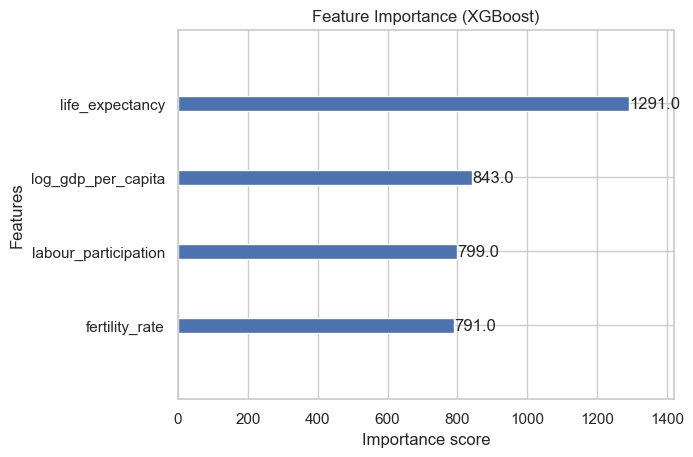

In [58]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Filter data for High-Income and Low-Income countries
high_income_df = df_model[df_model['IncomeGroup'] == 'High income']
low_income_df = df_model[df_model['IncomeGroup'] == 'Low income']

# Prepare features (X) and target (y) for High-Income Countries
X_high = high_income_df[['life_expectancy', 'log_gdp_per_capita', 'fertility_rate', 'labour_participation']]
y_high = high_income_df['health_expenditure']

# Prepare features (X) and target (y) for Low-Income Countries
X_low = low_income_df[['life_expectancy', 'log_gdp_per_capita', 'fertility_rate', 'labour_participation']]
y_low = low_income_df['health_expenditure']

# Train-Test Split for High-Income
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=42)

# Train-Test Split for Low-Income
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)

# Instantiate XGBoost Regressor
xgb_regressor = xgb.XGBRegressor(objective='reg:squarederror', eval_metric='rmse', random_state=42)

# Train the model for High-Income Countries
xgb_regressor.fit(X_train_high, y_train_high)

# Make predictions for High-Income Countries
y_pred_high = xgb_regressor.predict(X_test_high)

# Evaluate the model for High-Income Countries
mse_high = mean_squared_error(y_test_high, y_pred_high)
rmse_high = mse_high ** 0.5  # Calculate RMSE manually
r2_high = r2_score(y_test_high, y_pred_high)

# Train the model for Low-Income Countries
xgb_regressor.fit(X_train_low, y_train_low)

# Make predictions for Low-Income Countries
y_pred_low = xgb_regressor.predict(X_test_low)

# Evaluate the model for Low-Income Countries
mse_low = mean_squared_error(y_test_low, y_pred_low)
rmse_low = mse_low ** 0.5  # Calculate RMSE manually
r2_low = r2_score(y_test_low, y_pred_low)

# Print the evaluation results
print("High-Income Countries - XGBoost Model Evaluation")
print(f"Mean Squared Error (MSE): {mse_high}")
print(f"Root Mean Squared Error (RMSE): {rmse_high}")
print(f"R-squared: {r2_high}")

print("\nLow-Income Countries - XGBoost Model Evaluation")
print(f"Mean Squared Error (MSE): {mse_low}")
print(f"Root Mean Squared Error (RMSE): {rmse_low}")
print(f"R-squared: {r2_low}")

# Optional: Visualizing the feature importance
xgb.plot_importance(xgb_regressor)
plt.title("Feature Importance (XGBoost)")
plt.show()


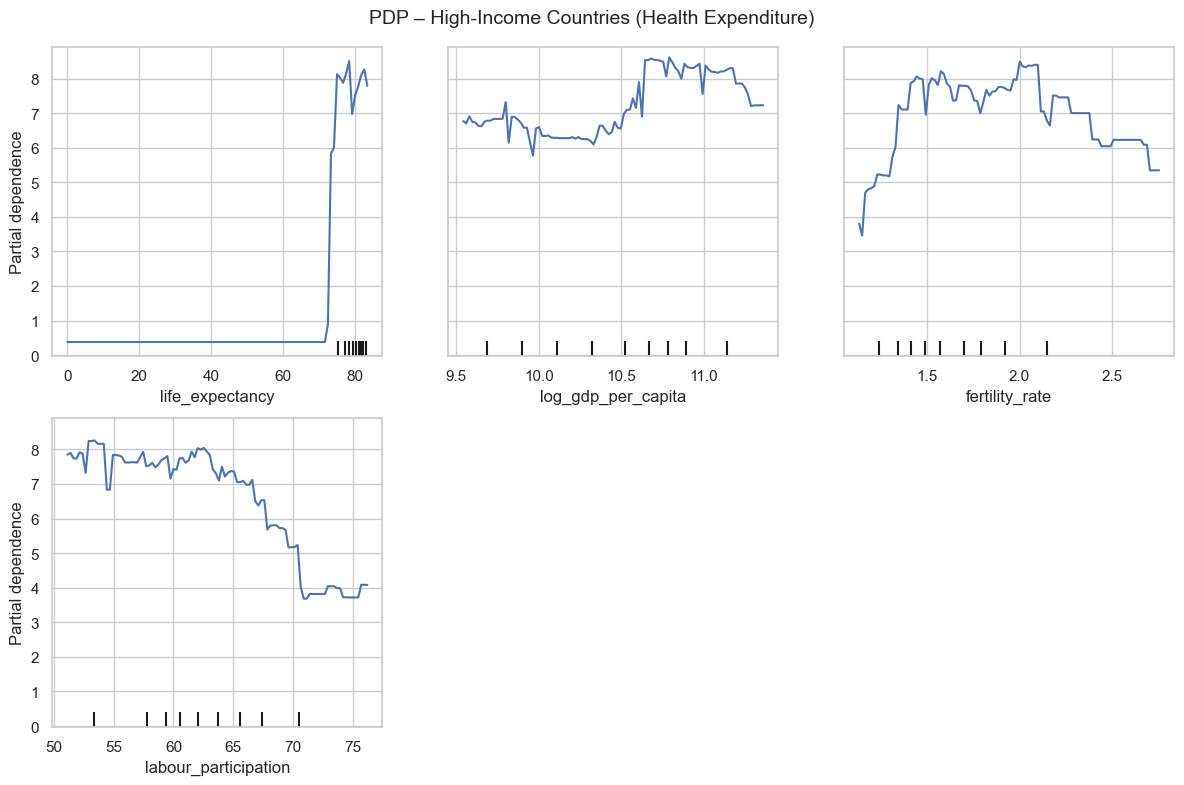

In [59]:
from sklearn.inspection import PartialDependenceDisplay

# Re-train model on full high-income data (not just train-test split)
xgb_regressor.fit(X_high, y_high)

fig, ax = plt.subplots(figsize=(12, 8))
features = ['life_expectancy', 'log_gdp_per_capita', 'fertility_rate', 'labour_participation']

PartialDependenceDisplay.from_estimator(
    xgb_regressor,
    X_high,
    features=features,
    kind="average",
    grid_resolution=100,
    ax=ax
)

plt.suptitle("PDP – High-Income Countries (Health Expenditure)", fontsize=14)
plt.tight_layout()
plt.show()


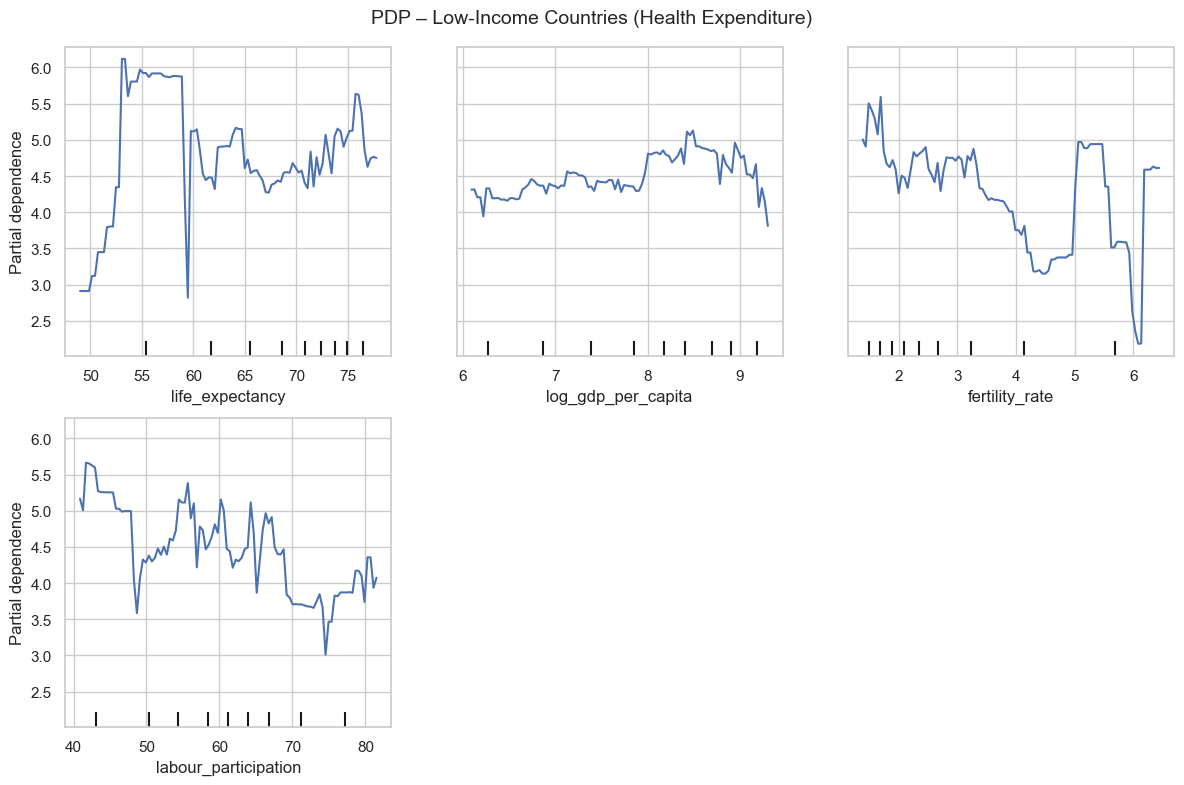

In [60]:
# Re-train model on full low-income data
xgb_regressor.fit(X_low, y_low)

fig, ax = plt.subplots(figsize=(12, 8))
features = ['life_expectancy', 'log_gdp_per_capita', 'fertility_rate', 'labour_participation']

PartialDependenceDisplay.from_estimator(
    xgb_regressor,
    X_low,
    features=features,
    kind="average",
    grid_resolution=100,
    ax=ax
)

plt.suptitle("PDP – Low-Income Countries (Health Expenditure)", fontsize=14)
plt.tight_layout()
plt.show()


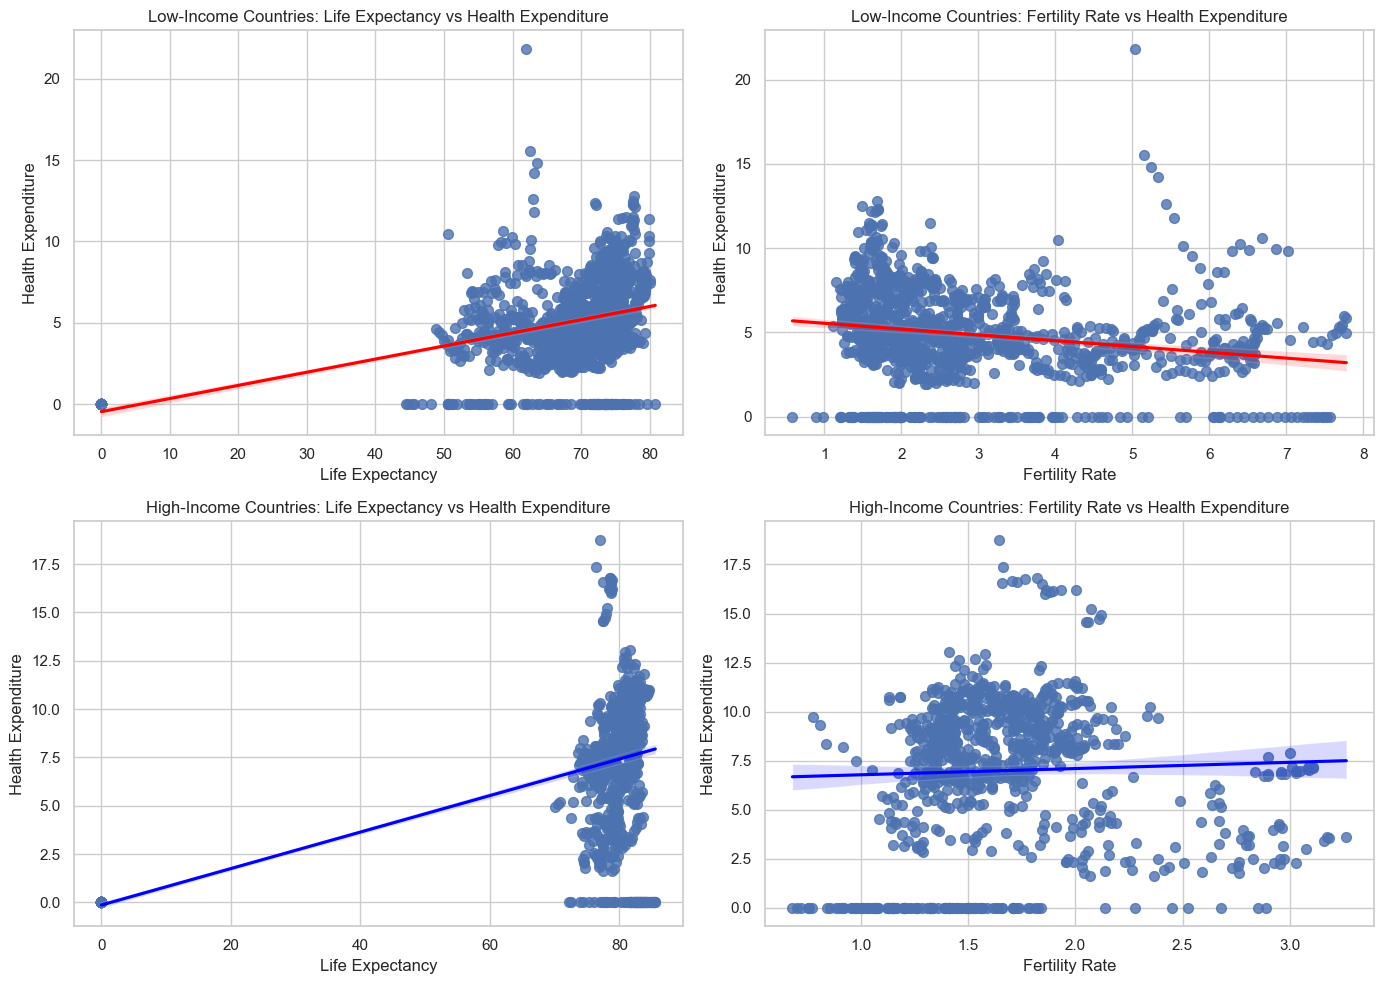

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for high-income and low-income countries
df_model=df_core.copy()
df_model = df_model.rename(columns={
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation',
    'Health Expenditure': 'health_expenditure'
})
high_income_df = df_model[df_model['IncomeGroup'] == 'High income']
low_income_df = df_model[df_model['IncomeGroup'] == 'Low income']

# Set the plot style
sns.set(style="whitegrid")

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(14, 10))

# Plot for Low-Income: Life Expectancy vs Health Expenditure
sns.regplot(x='life_expectancy', y='health_expenditure', data=low_income_df, ax=axs[0, 0], scatter_kws={'s': 50}, line_kws={'color': 'red'})
axs[0, 0].set_title('Low-Income Countries: Life Expectancy vs Health Expenditure')
axs[0, 0].set_xlabel('Life Expectancy')
axs[0, 0].set_ylabel('Health Expenditure')

# Plot for Low-Income: Fertility Rate vs Health Expenditure
sns.regplot(x='fertility_rate', y='health_expenditure', data=low_income_df, ax=axs[0, 1], scatter_kws={'s': 50}, line_kws={'color': 'red'})
axs[0, 1].set_title('Low-Income Countries: Fertility Rate vs Health Expenditure')
axs[0, 1].set_xlabel('Fertility Rate')
axs[0, 1].set_ylabel('Health Expenditure')

# Plot for High-Income: Life Expectancy vs Health Expenditure
sns.regplot(x='life_expectancy', y='health_expenditure', data=high_income_df, ax=axs[1, 0], scatter_kws={'s': 50}, line_kws={'color': 'blue'})
axs[1, 0].set_title('High-Income Countries: Life Expectancy vs Health Expenditure')
axs[1, 0].set_xlabel('Life Expectancy')
axs[1, 0].set_ylabel('Health Expenditure')

# Plot for High-Income: Fertility Rate vs Health Expenditure
sns.regplot(x='fertility_rate', y='health_expenditure', data=high_income_df, ax=axs[1, 1], scatter_kws={'s': 50}, line_kws={'color': 'blue'})
axs[1, 1].set_title('High-Income Countries: Fertility Rate vs Health Expenditure')
axs[1, 1].set_xlabel('Fertility Rate')
axs[1, 1].set_ylabel('Health Expenditure')

# Adjust layout
plt.tight_layout()
plt.show()


***Life Expectancy vs. Health Expenditure***
**Low-Income Countries:**
There is a positive relationship — as life expectancy increases, health expenditure also rises. This suggests improved longevity might reflect growing investment in basic healthcare infrastructure.

**High-Income Countries:**
A stronger positive correlation is visible. Countries with higher life expectancy clearly spend more on healthcare, possibly due to aging populations and the demand for advanced medical services.



***Fertility Rate vs. Health Expenditure***
**Low-Income Countries:**
The relationship is negative, indicating that higher fertility rates are associated with lower per capita health expenditure. This could reflect stretched healthcare resources in high-birth-rate nations.

**High-Income Countries:**
The relationship is slightly positive but weak, suggesting fertility has minimal impact on health expenditure. These nations may maintain high health spending regardless of demographic shifts due to robust healthcare systems.



In [62]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# Use a copy of df_model
lstm_df = df_model.copy()

# Keep only necessary columns
features = ['life_expectancy', 'log_gdp_per_capita', 'fertility_rate', 'labour_participation']
target = 'health_expenditure'

# Fill or drop missing values (you can customize this)
lstm_df = lstm_df.dropna(subset=features + [target])

# Normalize the features
scaler = MinMaxScaler()
lstm_df[features + [target]] = scaler.fit_transform(lstm_df[features + [target]])

# Sort values to maintain temporal order for LSTM
lstm_df = lstm_df.sort_index()


In [63]:
# Convert to sequences
def create_sequences(df, seq_length=5):
    X, y = [], []
    grouped = df.groupby('Country Name')
    for _, group in grouped:
        group = group.sort_index()
        values = group[features + [target]].values
        for i in range(len(values) - seq_length):
            X.append(values[i:i+seq_length, :-1])
            y.append(values[i+seq_length, -1])
    return np.array(X), np.array(y)

X_full, y_full = create_sequences(lstm_df)

# Define the LSTM model
model_full = Sequential([
    LSTM(64, input_shape=(X_full.shape[1], X_full.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model_full.compile(optimizer='adam', loss='mse')

# Train the model
early_stop = EarlyStopping(monitor='loss', patience=5, restore_best_weights=True)
model_full.fit(X_full, y_full, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)


C:\Users\dell1\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - loss: 0.0323
Epoch 2/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0268 
Epoch 3/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0250 
Epoch 4/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0258
Epoch 5/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0235 
Epoch 6/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0234 
Epoch 7/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0244 
Epoch 8/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0240
Epoch 9/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0228
Epoch 10/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0221
Epoch 11/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0233
Epoch 12/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0228
Epoch 13/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.0245
Epoch 14/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 0.0230  
Epoch 15/50
51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0214  
E

In [64]:
# Filter and sequence
high_df = lstm_df[lstm_df['IncomeGroup'] == 'High income']
X_high_lstm, y_high_lstm = create_sequences(high_df)

# Build and train model
model_high = Sequential([
    LSTM(64, input_shape=(X_high_lstm.shape[1], X_high_lstm.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model_high.compile(optimizer='adam', loss='mse')
model_high.fit(X_high_lstm, y_high_lstm, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)


Epoch 1/50


C:\Users\dell1\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


21/21 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0835
Epoch 2/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0371
Epoch 3/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0329 
Epoch 4/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0371 
Epoch 5/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0329
Epoch 6/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0337
Epoch 7/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0319 
Epoch 8/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0312
Epoch 9/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.0322 
Epoch 10/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0301 
Epoch 11/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0315
Epoch 12/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0324
Epoch 13/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0310 
Epoch 14/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0293 
Epoch 15/50
21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0293
Epoch 16/5

In [65]:
# Filter and sequence
low_df = lstm_df[lstm_df['IncomeGroup'] == 'Low income']
X_low_lstm, y_low_lstm = create_sequences(low_df)

# Build and train model
model_low = Sequential([
    LSTM(64, input_shape=(X_low_lstm.shape[1], X_low_lstm.shape[2]), return_sequences=False),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(1)
])
model_low.compile(optimizer='adam', loss='mse')
model_low.fit(X_low_lstm, y_low_lstm, epochs=50, batch_size=32, callbacks=[early_stop], verbose=1)


Epoch 1/50


C:\Users\dell1\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0542
Epoch 2/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0185
Epoch 3/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0175
Epoch 4/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161 
Epoch 5/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0176 
Epoch 6/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0167  
Epoch 7/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0180
Epoch 8/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0157 
Epoch 9/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0171 
Epoch 10/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0161 
Epoch 11/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0168 
Epoch 12/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.0163
Epoch 13/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0169   
Epoch 14/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0173
Epoch 15/50
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.0165
Epoch 16/50


In [66]:
from sklearn.metrics import mean_squared_error, r2_score

def evaluate_lstm(model, X, y, label):
    y_pred = model.predict(X)
    mse = mean_squared_error(y, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y, y_pred)
    print(f"{label} Evaluation:")
    print(f"  RMSE: {rmse}")
    print(f"  R²: {r2}")

evaluate_lstm(model_full, X_full, y_full, "Full Dataset")
evaluate_lstm(model_high, X_high_lstm, y_high_lstm, "High-Income Countries")
evaluate_lstm(model_low, X_low_lstm, y_low_lstm, "Low-Income Countries")


51/51 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step   
Full Dataset Evaluation:
  RMSE: 0.13175898627285249
  R²: 0.34844117077394154
21/21 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step 
High-Income Countries Evaluation:
  RMSE: 0.1702141098765488
  R²: 0.12360786413830649
29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step 
Low-Income Countries Evaluation:
  RMSE: 0.11714720064710983
  R²: 0.23569347016661935


51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


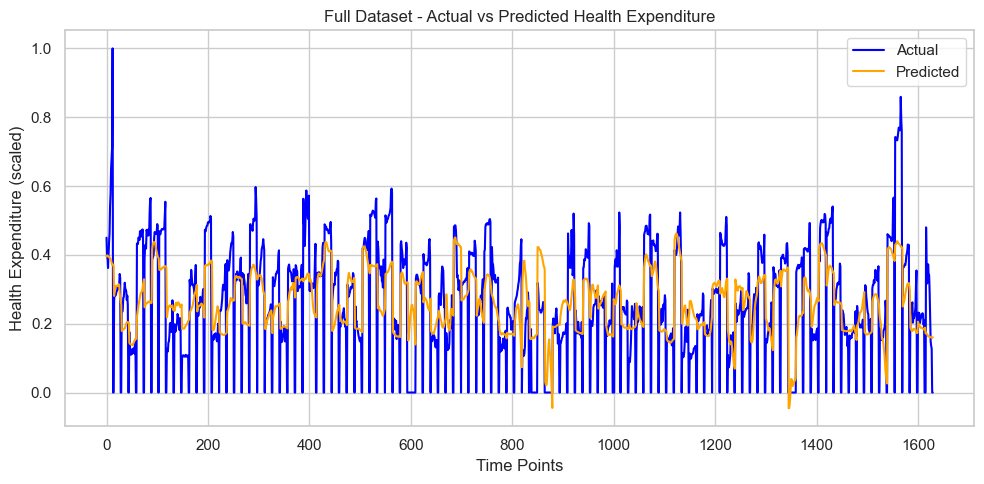

21/21 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


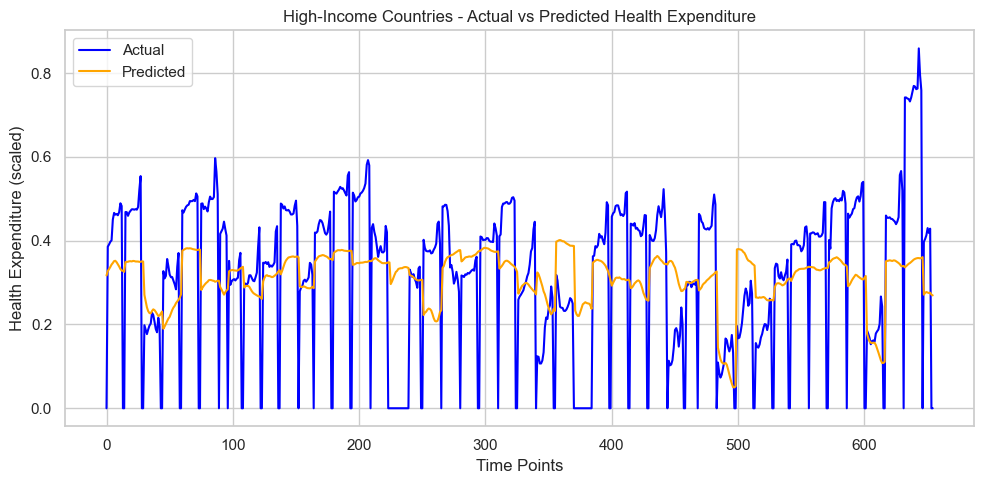

29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


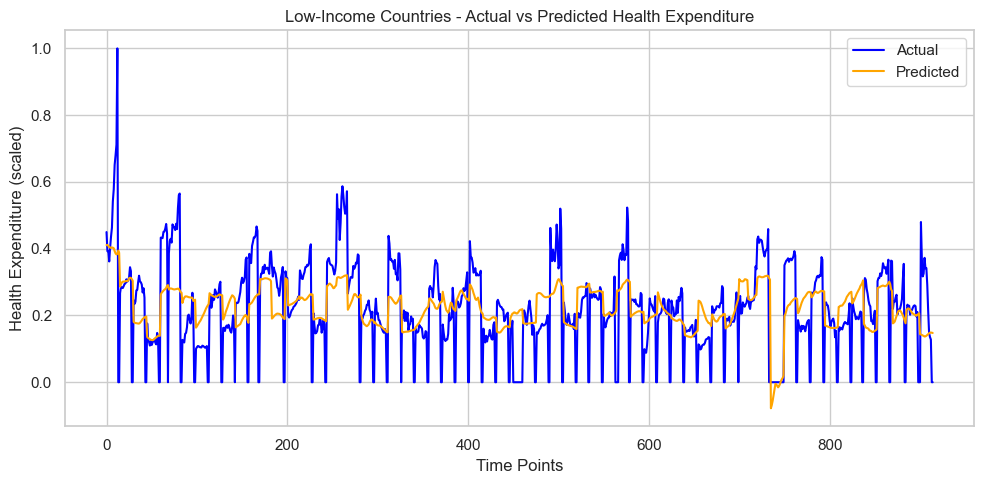

In [67]:
import matplotlib.pyplot as plt

def plot_predictions(model, X, y, title):
    y_pred = model.predict(X).flatten()
    plt.figure(figsize=(10, 5))
    plt.plot(y, label='Actual', color='blue')
    plt.plot(y_pred, label='Predicted', color='orange')
    plt.title(f'{title} - Actual vs Predicted Health Expenditure')
    plt.xlabel('Time Points')
    plt.ylabel('Health Expenditure (scaled)')
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_predictions(model_full, X_full, y_full, "Full Dataset")
plot_predictions(model_high, X_high_lstm, y_high_lstm, "High-Income Countries")
plot_predictions(model_low, X_low_lstm, y_low_lstm, "Low-Income Countries")


In [68]:
# 👇 Replace these with any countries you want from your dataset
selected_countries = [
    'India',
    'United States',
    'United Kingdom',
    'Germany',
    'Nigeria',
    'Brazil',
    'China',
    'South Africa',
    'Indonesia',
    'Japan'
]


In [69]:
def forecast_selected_countries(df_grouped, model, seq_length, selected_countries):
    forecast_dict = {}
    for country in selected_countries:
        if country in df_grouped.groups:
            group = df_grouped.get_group(country).sort_index()
            if len(group) >= seq_length:
                last_seq = group[features].values[-seq_length:]
                last_seq = np.expand_dims(last_seq, axis=0)
                next_pred = model.predict(last_seq)[0][0]
                forecast_dict[country] = next_pred
            else:
                forecast_dict[country] = None  # Not enough data
        else:
            forecast_dict[country] = None  # Country not found
    return forecast_dict

# Group by country
seq_length = 5  # or the same value you used during LSTM model training
grouped_full = lstm_df.groupby('Country Name')


# Forecast for selected countries
forecast_selected = forecast_selected_countries(grouped_full, model_full, seq_length, selected_countries)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step


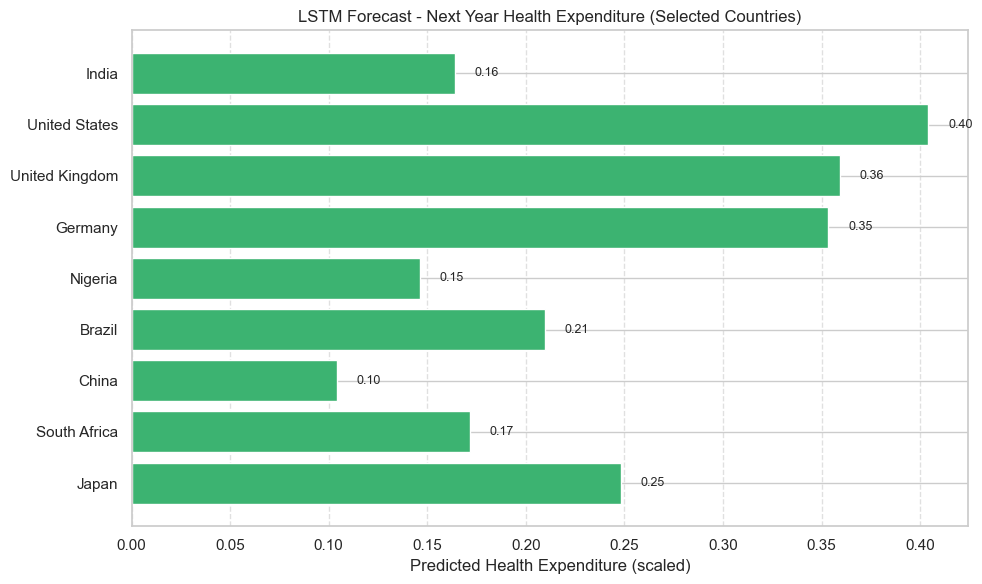

In [70]:
import matplotlib.pyplot as plt

# Clean data: only keep countries where a forecast exists
countries_to_plot = [c for c in selected_countries if forecast_selected[c] is not None]
values_to_plot = [forecast_selected[c] for c in countries_to_plot]

# Plot
plt.figure(figsize=(10, 6))
bars = plt.barh(countries_to_plot, values_to_plot, color='mediumseagreen')
plt.xlabel("Predicted Health Expenditure (scaled)")
plt.title("LSTM Forecast - Next Year Health Expenditure (Selected Countries)")
plt.gca().invert_yaxis()  # Highest at top
plt.grid(axis='x', linestyle='--', alpha=0.6)

# Optional: annotate bars
for bar in bars:
    width = bar.get_width()
    plt.text(width + 0.01, bar.get_y() + bar.get_height()/2,
             f'{width:.2f}', va='center', fontsize=9)

plt.tight_layout()
plt.show()


Q3. How does GDP relate to key demographic and socioeconomic factors such as fertility rate, life expectancy, and labour participation?

In [71]:
import statsmodels.api as sm

# Reset index for flat structure (not panel)
df_mlr = df_model.reset_index()
df_model = df_core.copy()
df_model = df_model.rename(columns={
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation'
})

# Define independent and dependent variables
features = ['fertility_rate', 'life_expectancy', 'labour_participation']
target = 'log_gdp_per_capita'

# Drop rows with missing values in required columns
df_mlr_clean = df_mlr[features + [target, 'IncomeGroup']].dropna()

# Function to run MLR for each income group
def run_mlr_income_group(df, income_group):
    group_df = df[df['IncomeGroup'] == income_group]
    
    X = group_df[features]
    y = group_df[target]
    X = sm.add_constant(X)
    
    model = sm.OLS(y, X).fit()
    
    print(f"\nMultiple Linear Regression – {income_group} Countries:\n")
    print(model.summary())

# Run MLR for High-Income and Low-Income
run_mlr_income_group(df_mlr_clean, 'High income')
run_mlr_income_group(df_mlr_clean, 'Low income')



Multiple Linear Regression – High income Countries:

                            OLS Regression Results                            
Dep. Variable:     log_gdp_per_capita   R-squared:                       0.170
Model:                            OLS   Adj. R-squared:                  0.167
Method:                 Least Squares   F-statistic:                     62.19
Date:                Fri, 25 Jul 2025   Prob (F-statistic):           1.39e-36
Time:                        10:52:34   Log-Likelihood:                -661.45
No. Observations:                 915   AIC:                             1331.
Df Residuals:                     911   BIC:                             1350.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------

**High-Income Countries**
Fertility Rate: Negative and significant. Higher fertility is associated with lower GDP per capita, possibly due to greater dependency burdens.

Labour Participation: Strong positive effect, indicating countries with more active labor forces tend to have higher GDP per capita.

Life Expectancy: Marginally positive but not significant at 5% level.

Model Fit: Modest explanatory power (R² = 0.17).

**Low-Income Countries**
Fertility Rate: Strong negative and highly significant. An important drag on economic output per capita.

Life Expectancy and Labour Participation: Statistically insignificant.

Model Fit: Moderate (R² = 0.53), fertility dominates the predictive ability.

In [72]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from linearmodels.panel import PanelOLS
df_model = df_core.copy()
df_model = df_model.rename(columns={
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation'
})
# 1. Create log GDP per capita
df_model['log_gdp_per_capita'] = np.log(df_model['GDP'])

# 2. Set panel index
df_model = df_model.set_index(['Country Name', 'Year'])

# 3. Split by income group
df_high = df_model[df_model['IncomeGroup'] == 'High income']
df_low = df_model[df_model['IncomeGroup'] == 'Low income']

# 4. Define independent variables
independent_vars = ['fertility_rate', 'life_expectancy', 'labour_participation']

# ------------------ High-Income Countries ------------------
X_high = sm.add_constant(df_high[independent_vars])
y_high = df_high['log_gdp_per_capita']
model_high = PanelOLS(y_high, X_high, entity_effects=True)
results_high = model_high.fit()
print("Fixed Effects Model - High-Income Countries")
print(results_high)

# ------------------ Low-Income Countries ------------------
X_low = sm.add_constant(df_low[independent_vars])
y_low = df_low['log_gdp_per_capita']
model_low = PanelOLS(y_low, X_low, entity_effects=True)
results_low = model_low.fit()
print("Fixed Effects Model - Low-Income Countries")
print(results_low)


Fixed Effects Model - High-Income Countries
                          PanelOLS Estimation Summary                           
Dep. Variable:     log_gdp_per_capita   R-squared:                        0.1814
Estimator:                   PanelOLS   R-squared (Between):              0.0918
No. Observations:                 915   R-squared (Within):               0.1814
Date:                Fri, Jul 25 2025   R-squared (Overall):              0.1558
Time:                        10:52:34   Log-likelihood                    366.80
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      63.247
Entities:                          56   P-value                           0.0000
Avg Obs:                       16.339   Distribution:                   F(3,856)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (robust):    

**High-Income Countries**
Fertility Rate: Negative and significant, consistent with MLR.

Labour Participation: Strongly positive; confirms that increases over time within countries boost GDP.

Life Expectancy: Surprisingly negative and significant, suggesting internal aging trends may hinder productivity.

Model Fit: Low explanatory power of within-country changes (Within R² = 0.18), but fixed effects account for unobserved country heterogeneity.

**Low-Income Countries**
Fertility Rate: Strong negative and highly significant.

Labour Participation: Weakly negative, significant at 10% level; may reflect informal labor dynamics.

Life Expectancy: Weakly negative, marginally significant.

Model Fit: Weak explanatory power (Within R² = 0.16), country-specific factors dominate over time-varying changes.



In [73]:
import pandas as pd
from linearmodels.panel import RandomEffects

# Ensure 'country' and 'year' are in the index
df_model = df_core.copy()
df_model = df_model.rename(columns={
    'Life Expectancy': 'life_expectancy',
    'Fertility Rate': 'fertility_rate',
    'Labour Participation': 'labour_participation'
})
df_model = df_model.reset_index(drop=True)
df_model = df_model.set_index(['Country Name', 'Year'])

# Subsets for income groups
df_high = df_model[df_model['IncomeGroup'] == 'High income']
df_low = df_model[df_model['IncomeGroup'] == 'Low income']

# Random Effects Model for High-Income Countries
re_model_high = RandomEffects.from_formula(
    'log_gdp_per_capita ~ fertility_rate + life_expectancy + labour_participation',
    data=df_high
).fit()

# Random Effects Model for Low-Income Countries
re_model_low = RandomEffects.from_formula(
    'log_gdp_per_capita ~ fertility_rate + life_expectancy + labour_participation',
    data=df_low
).fit()

# Print summaries
print("\n--- Random Effects Model: High-Income Countries ---")
print(re_model_high.summary)

print("\n--- Random Effects Model: Low-Income Countries ---")
print(re_model_low.summary)



--- Random Effects Model: High-Income Countries ---
                        RandomEffects Estimation Summary                        
Dep. Variable:     log_gdp_per_capita   R-squared:                        0.8337
Estimator:              RandomEffects   R-squared (Between):              0.9749
No. Observations:                 915   R-squared (Within):              -1.0357
Date:                Fri, Jul 25 2025   R-squared (Overall):              0.9727
Time:                        10:52:35   Log-likelihood                   -119.30
Cov. Estimator:            Unadjusted                                           
                                        F-statistic:                      1524.4
Entities:                          56   P-value                           0.0000
Avg Obs:                       16.339   Distribution:                   F(3,912)
Min Obs:                       1.0000                                           
Max Obs:                       20.000   F-statistic (rob

**High-Income Countries**
Fertility Rate: Positive and significant (unlike MLR/FE) — may reflect between-country differences (e.g., countries with slightly higher fertility and economic vibrancy).

Labour Participation: Very strong positive association (coefficient = 0.13), reinforcing the productivity link.

Life Expectancy: Slightly negative, marginally significant.

Model Fit: Very high (R² = 0.83) — between-country variations explain most of the GDP differences.

**Low-Income Countries**
Fertility Rate: Strong negative and significant — consistent across models.

Labour Participation: Positive and significant, in contrast to MLR and FE, again highlighting between-country structural advantages.

Life Expectancy: Slightly positive, marginally significant.

Model Fit: Good overall (R² = 0.51) — large variation across countries captured.

In [74]:
from scipy import stats

def hausman_test(fe_res, re_res):
    # Get aligned coefficients
    b_FE = fe_res.params
    b_RE = re_res.params

    common_coef = b_FE.index.intersection(b_RE.index)
    b_FE = b_FE.loc[common_coef]
    b_RE = b_RE.loc[common_coef]

    # Difference in coefficients
    b_diff = b_FE - b_RE

    # Variance of the difference
    V_FE = fe_res.cov.loc[common_coef, common_coef]
    V_RE = re_res.cov.loc[common_coef, common_coef]
    V_diff = V_FE - V_RE

    # Hausman test statistic
    stat = float(b_diff.T @ np.linalg.inv(V_diff) @ b_diff)
    df = len(b_diff)
    pval = 1 - stats.chi2.cdf(stat, df)

    return stat, pval


In [75]:
stat_high, pval_high = hausman_test(results_high, re_model_high)

print("\n=== Hausman Test: High-Income Countries ===")
print(f"Chi-squared statistic: {stat_high:.4f}")
print(f"p-value: {pval_high:.4f}")

if pval_high < 0.05:
    print("→ Reject null → Fixed Effects is preferred.")
else:
    print("→ Fail to reject null → Random Effects is preferred.")



=== Hausman Test: High-Income Countries ===
Chi-squared statistic: 2119.9939
p-value: 0.0000
→ Reject null → Fixed Effects is preferred.


In [76]:
stat_low, pval_low = hausman_test(results_low, re_model_low)

print("\n=== Hausman Test: Low-Income Countries ===")
print(f"Chi-squared statistic: {stat_low:.4f}")
print(f"p-value: {pval_low:.4f}")

if pval_low < 0.05:
    print("→ Reject null → Fixed Effects is preferred.")
else:
    print("→ Fail to reject null → Random Effects is preferred.")



=== Hausman Test: Low-Income Countries ===
Chi-squared statistic: 1117.6197
p-value: 0.0000
→ Reject null → Fixed Effects is preferred.


In [77]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target
features = ['fertility_rate', 'life_expectancy', 'labour_participation']
target = 'log_gdp_per_capita'

# Split high-income and low-income countries
df_high = df_model[df_model['IncomeGroup'] == 'High income']
df_low = df_model[df_model['IncomeGroup'] == 'Low income']

# Prepare data for High-Income countries
X_high = df_high[features]
y_high = df_high[target]
X_train_high, X_test_high, y_train_high, y_test_high = train_test_split(X_high, y_high, test_size=0.2, random_state=42)

# Prepare data for Low-Income countries
X_low = df_low[features]
y_low = df_low[target]
X_train_low, X_test_low, y_train_low, y_test_low = train_test_split(X_low, y_low, test_size=0.2, random_state=42)

# Train XGBoost model for High-Income countries
model_high = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_high.fit(X_train_high, y_train_high)
y_pred_high = model_high.predict(X_test_high)

# Evaluation for High-Income countries
mse_high = mean_squared_error(y_test_high, y_pred_high)
rmse_high = np.sqrt(mse_high)
r2_high = r2_score(y_test_high, y_pred_high)

print("\n--- XGBoost: High-Income Countries ---")
print(f"MSE: {mse_high:.4f}")
print(f"RMSE: {rmse_high:.4f}")
print(f"R-squared: {r2_high:.4f}")

# Train XGBoost model for Low-Income countries
model_low = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)
model_low.fit(X_train_low, y_train_low)
y_pred_low = model_low.predict(X_test_low)

# Evaluation for Low-Income countries
mse_low = mean_squared_error(y_test_low, y_pred_low)
rmse_low = np.sqrt(mse_low)
r2_low = r2_score(y_test_low, y_pred_low)

print("\n--- XGBoost: Low-Income Countries ---")
print(f"MSE: {mse_low:.4f}")
print(f"RMSE: {rmse_low:.4f}")
print(f"R-squared: {r2_low:.4f}")



--- XGBoost: High-Income Countries ---
MSE: 0.1024
RMSE: 0.3200
R-squared: 0.6680

--- XGBoost: Low-Income Countries ---
MSE: 0.1730
RMSE: 0.4159
R-squared: 0.8317


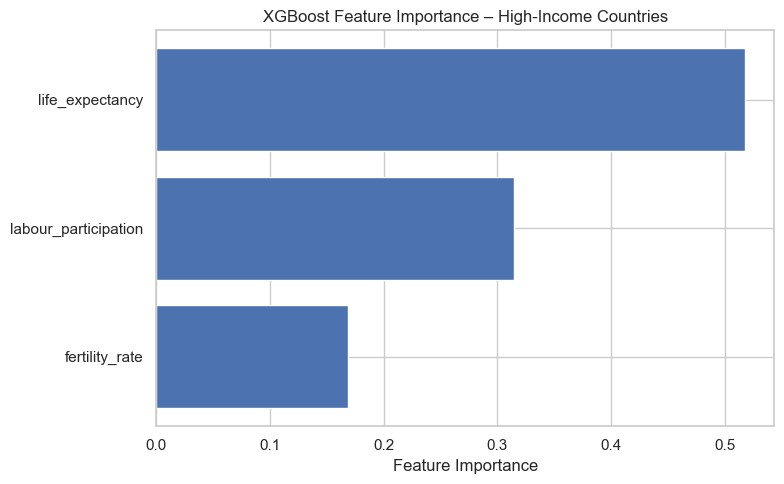

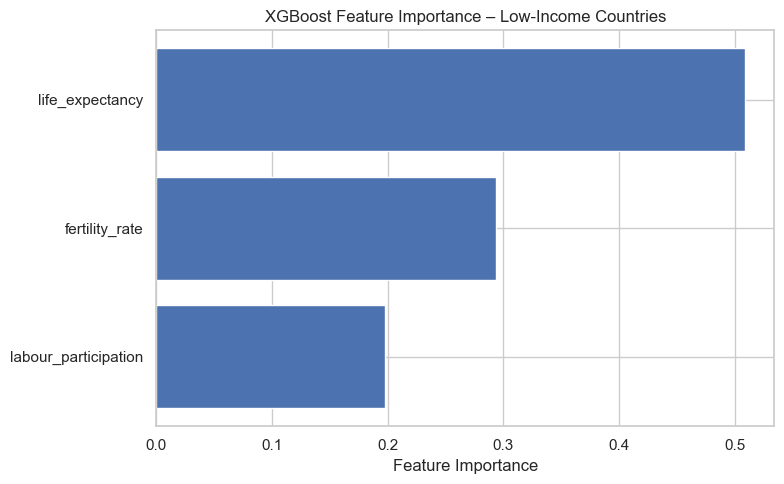

In [78]:
import matplotlib.pyplot as plt

def plot_feature_importance(model, features, title):
    importance = model.feature_importances_
    sorted_idx = np.argsort(importance)[::-1]  # Sort descending

    plt.figure(figsize=(8, 5))
    plt.barh([features[i] for i in sorted_idx], importance[sorted_idx])
    plt.xlabel("Feature Importance")
    plt.title(title)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()

# Plot for High-Income Countries
plot_feature_importance(model_high, features, "XGBoost Feature Importance – High-Income Countries")

# Plot for Low-Income Countries
plot_feature_importance(model_low, features, "XGBoost Feature Importance – Low-Income Countries")



PDP – High-Income Countries


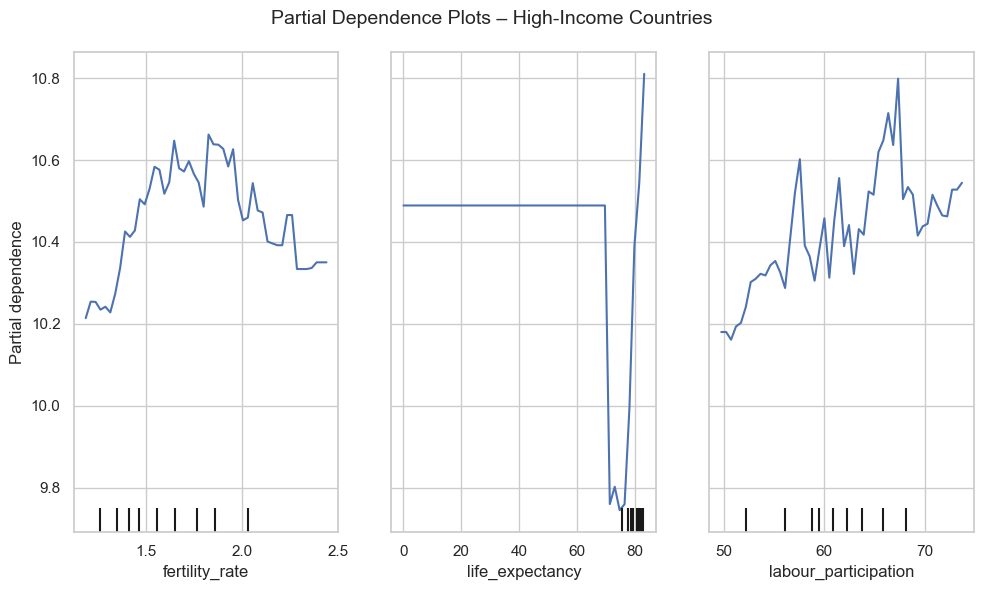


PDP – Low-Income Countries


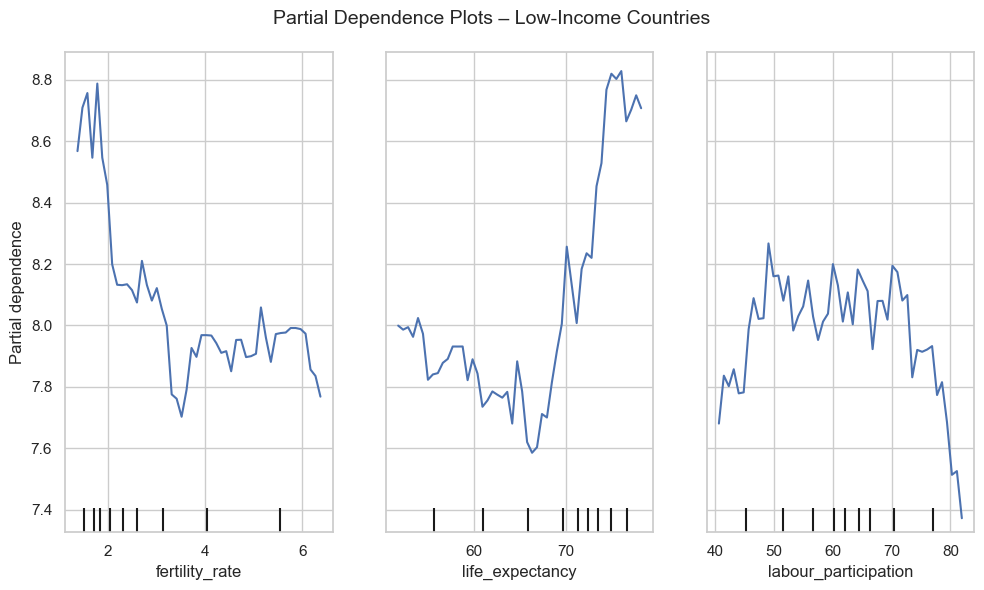

In [96]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# --- High-Income PDP ---
print("\nPDP – High-Income Countries")
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    model_high, 
    X_test_high, 
    features=features, 
    kind="average", 
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Partial Dependence Plots – High-Income Countries", fontsize=14)
plt.tight_layout()
plt.show()

# --- Low-Income PDP ---
print("\nPDP – Low-Income Countries")
fig, ax = plt.subplots(figsize=(10, 6))
PartialDependenceDisplay.from_estimator(
    model_low, 
    X_test_low, 
    features=features, 
    kind="average", 
    grid_resolution=50,
    ax=ax
)
plt.suptitle("Partial Dependence Plots – Low-Income Countries", fontsize=14)
plt.tight_layout()
plt.show()



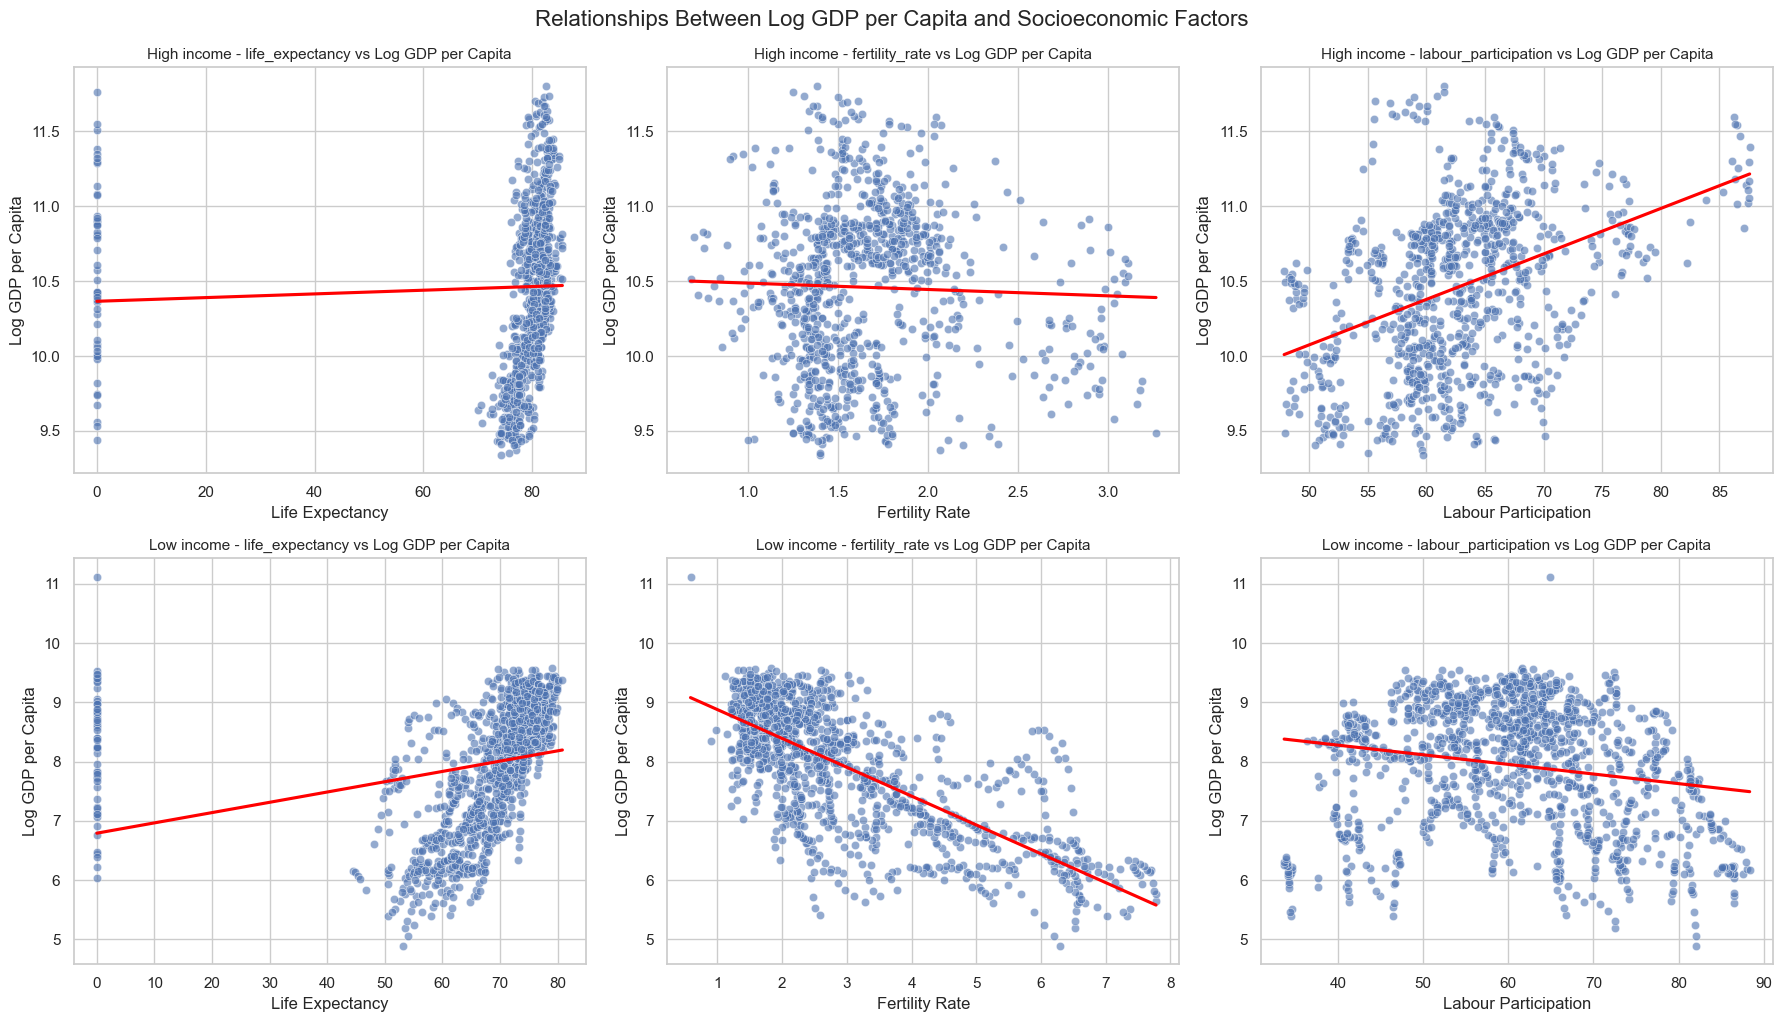

In [80]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the plotting style
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (16, 12)

# Define your income groups and variables
income_groups = ['High income', 'Low income']
predictors = ['life_expectancy', 'fertility_rate', 'labour_participation']

# Create subplots: 2 rows (income groups), 3 columns (predictors)
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(18, 10), sharey=False)

for i, income in enumerate(income_groups):
    df_subset = df_model[df_model['IncomeGroup'] == income]
    
    for j, var in enumerate(predictors):
        ax = axes[i, j]
        sns.scatterplot(data=df_subset, x=var, y='log_gdp_per_capita', alpha=0.6, ax=ax)
        sns.regplot(data=df_subset, x=var, y='log_gdp_per_capita', scatter=False, ax=ax, color='red', ci=None)
        ax.set_title(f"{income} - {var} vs Log GDP per Capita", fontsize=11)
        ax.set_xlabel(var.replace('_', ' ').title())
        ax.set_ylabel("Log GDP per Capita")

plt.tight_layout()
plt.suptitle("Relationships Between Log GDP per Capita and Socioeconomic Factors", fontsize=16, y=1.02)
plt.show()


***Low-Income Countries***
**Life Expectancy vs. Log GDP per Capita**
A clear positive association is observed. Countries with higher life expectancy tend to exhibit greater economic prosperity, reflecting potential improvements in healthcare, stability, and workforce longevity.

**Fertility Rate vs. Log GDP per Capita**
There is a strong negative relationship. Higher fertility rates are significantly associated with lower GDP per capita, likely due to increased dependency ratios and pressure on limited economic resources.

**Labour Participation vs. Log GDP per Capita**
A slight negative trend is visible. This counterintuitive result suggests that labor participation in low-income economies might reflect informal or subsistence employment rather than productive labor, highlighting the need for job quality over quantity.

***High-Income Countries***
**Life Expectancy vs. Log GDP per Capita**
The relationship is weakly positive, with limited variation due to already high life expectancy. Economic gains from longevity may have plateaued in these countries.

**Fertility Rate vs. Log GDP per Capita**
A subtle negative association is noted. While fertility is generally low, countries with slightly higher rates may be experiencing slower economic output, possibly linked to aging populations and lower labor force growth.

**Labour Participation vs. Log GDP per Capita**
A strong positive correlation is evident. Higher participation rates align with greater economic output, emphasizing the importance of labor market engagement and human capital utilization in developed economies.

In [81]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, r2_score


# Preprocessing
features = ['fertility_rate', 'life_expectancy', 'labour_participation']
target = 'log_gdp_per_capita'
seq_length = 3

# Function to create LSTM sequences
def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length, :-1])
        y.append(data[i+seq_length, -1])
    return np.array(X), np.array(y)

# Train LSTM for a group
def run_lstm(df_group, group_name):
    grouped = df_group.groupby('Country Name')
    X_all, y_all = [], []
    for _, group in grouped:
        group = group.sort_values('Year')
        if len(group) <= seq_length:
            continue
        scaler = MinMaxScaler()
        scaled = scaler.fit_transform(group[features + [target]])
        X, y = create_sequences(scaled, seq_length)
        X_all.append(X)
        y_all.append(y)
    if not X_all:
        return None, None, None
    X_all = np.concatenate(X_all)
    y_all = np.concatenate(y_all)
    split = int(0.8 * len(X_all))
    X_train, X_test = X_all[:split], X_all[split:]
    y_train, y_test = y_all[:split], y_all[split:]

    model = Sequential([
        LSTM(50, activation='tanh', input_shape=(X_train.shape[1], X_train.shape[2])),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    model.fit(X_train, y_train, epochs=100, verbose=0)

    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)

    print(f"{group_name} - RMSE: {rmse:.4f}, R2: {r2:.4f}")
    return y_test, y_pred, model

# Subsets
df_full = df_model.dropna(subset=features + [target])
df_high = df_full[df_full['IncomeGroup'] == 'High income']
df_low = df_full[df_full['IncomeGroup'] == 'Low income']

# Run models
y_true_f, y_pred_f, model_f = run_lstm(df_full, "Full Dataset")
y_true_h, y_pred_h, model_h = run_lstm(df_high, "High Income")
y_true_l, y_pred_l, model_l = run_lstm(df_low, "Low Income")



C:\Users\dell1\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 30ms/step 
Full Dataset - RMSE: 0.2338, R2: -0.0099


C:\Users\dell1\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 98ms/step 
High Income - RMSE: 0.2507, R2: -0.0885


C:\Users\dell1\anaconda3\envs\tf_env\lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 49ms/step 
Low Income - RMSE: 0.2228, R2: 0.0394


Q4. How does public concern or awareness measured via Google Trends relate to demographic and economic productivity?

In [83]:
df=pd.read_excel('final_dataset.xlsx')
df

Country Name  Year          GDP  Life Expectancy  Health Expenditure  \
0     Afghanistan  2004   221.763654           57.944            9.808474   
1     Afghanistan  2005   254.184249           58.361            9.948289   
2     Afghanistan  2006   274.218554           58.684           10.622766   
3     Afghanistan  2007   376.223152           59.111            9.904675   
4     Afghanistan  2008   381.733238           59.852           10.256495   
...           ...   ...          ...              ...                 ...   
2174     Zimbabwe  2019  1684.027904           61.292            3.232802   
2175     Zimbabwe  2020  1730.413489           61.124            2.954401   
2176     Zimbabwe  2021  1724.387731           59.253            2.789751   
2177     Zimbabwe  2022  2040.552459           59.391            0.000000   
2178     Zimbabwe  2023  2156.034004            0.000            0.000000   

      Age Dependency  Population  Retirement age  Elderly care  \
0         110.285308    23560654             NaN           NaN   
1         109.728525    24404567             NaN           NaN   
2         108.889135    25424094             NaN           NaN   
3         107.737251    25909852             NaN           NaN   
4         106.334376    26482622             NaN           NaN   
...              ...         ...             ...           ...   
2174       85.447906    15271368             NaN           NaN   
2175       84.384381    15526888             NaN           NaN   
2176       83.384953    15797210             NaN           NaN   
2177       82.547605    16069056             NaN           NaN   
2178       81.625352    16340822             NaN           NaN   

      Healthcare Costs  Aging Population     GNI  Fertility Rate  \
0                  NaN               NaN   210.0           7.018   
1                  NaN               NaN   250.0           6.858   
2                  NaN               NaN   270.0           6.686   
3                  NaN               NaN   330.0           6.508   
4                  NaN               NaN   370.0           6.392   
...                ...               ...     ...             ...   
2174               NaN               NaN  2170.0           3.748   
2175               NaN               NaN  1690.0           3.754   
2176               NaN               NaN  1740.0           3.765   
2177               NaN               NaN  1960.0           3.767   
2178               NaN               NaN  2060.0           3.724   

      Labour Participation  
0                   46.507  
1                   46.532  
2                   46.570  
3                   46.621  
4                   46.680  
...                    ...  
2174                65.795  
2175                64.763  
2176                65.398  
2177                65.214  
2178                65.001  

[2179 rows x 14 columns]

In [84]:
# Step 1: Drop rows with missing values in any Google Trends column
google_trend_cols = [
    'Retirement age',
    'Elderly care',
    'Healthcare Costs',
    'Aging Population'
]

df_trends = df.dropna(subset=google_trend_cols)

In [85]:
# Step 2: Get unique countries that have at least one year of complete trends data
valid_countries = df_trends['Country Name'].unique()
valid_countries

array(['Australia', 'Canada', 'Germany', 'Spain', 'Finland',
       'United Kingdom', 'India', 'Ireland', 'Italy', 'Mexico',
       'Malaysia', 'Netherlands', 'Thailand', 'United States',
       'South Africa'], dtype=object)

In [86]:
# Step 3: Filter your main DataFrame to only include those countries
df_filtered = df[df['Country Name'].isin(valid_countries)].copy()

In [87]:
def classify_income_group_binary(GNI):
    if GNI >= 12236:  # 2024 World Bank threshold for High income
        return 'High income'
    else:
        return 'Low income'

df_filtered['IncomeGroup'] = df['GNI'].apply(classify_income_group_binary)


In [88]:
df_filtered

Country Name  Year           GDP  Life Expectancy  Health Expenditure  \
120      Australia  2005  34479.767930        80.841463            7.970294   
121      Australia  2006  36595.707155        81.041463            7.977025   
122      Australia  2007  41051.612065        81.292683            8.054965   
123      Australia  2008  49701.281784        81.395122            8.248551   
124      Australia  2009  42816.567400        81.543902            8.544739   
...            ...   ...           ...              ...                 ...   
2154  South Africa  2019   6533.711210        66.175000            8.244189   
2155  South Africa  2020   5580.603831        65.252000            8.572588   
2156  South Africa  2021   6843.399419        62.341000            8.273091   
2157  South Africa  2022   6523.410978        61.480000            0.000000   
2158  South Africa  2023   6022.542542         0.000000            0.000000   

      Age Dependency  Population  Retirement age  Elderly care  \
120        48.475300    20176844            30.0           1.0   
121        48.329676    20450966            30.0           1.0   
122        48.218323    20827622            30.0           1.0   
123        48.125390    21249199            30.0           1.0   
124        48.148257    21691653            30.0           1.0   
...              ...         ...             ...           ...   
2154       50.094339    59587885            13.0           1.0   
2155       49.496142    60562381            13.0           1.0   
2156       48.916285    61502603            13.0           1.0   
2157       48.550466    62378410            13.0           1.0   
2158       48.367934    63212384            13.0           1.0   

      Healthcare Costs  Aging Population      GNI  Fertility Rate  \
120               22.0              22.0  30740.0           1.807   
121               22.0              22.0  34600.0           1.908   
122               22.0              22.0  37390.0           1.959   
123               22.0              22.0  42410.0           1.984   
124               22.0              22.0  44100.0           1.971   
...                ...               ...      ...             ...   
2154              11.0               3.0   6570.0           2.264   
2155              11.0               3.0   5930.0           2.257   
2156              11.0               3.0   6330.0           2.248   
2157              11.0               3.0   6530.0           2.227   
2158              11.0               3.0   6480.0           2.216   

      Labour Participation  IncomeGroup  
120                 64.509  High income  
121                 64.850  High income  
122                 65.275  High income  
123                 65.564  High income  
124                 65.502  High income  
...                    ...          ...  
2154                58.327   Low income  
2155                54.701   Low income  
2156                55.760   Low income  
2157                56.942   Low income  
2158                58.528   Low income  

[299 rows x 15 columns]

In [89]:
# Group data
high_income = df_filtered[df_filtered['IncomeGroup'] == 'High income']
low_income = df_filtered[df_filtered['IncomeGroup'] == 'Low income']


In [90]:
# Select relevant columns
trend_cols = ['Aging Population', 'Retirement age', 'Elderly care', 'Healthcare Costs']
real_cols = ['GDP', 'Health Expenditure', 'Life Expectancy', 'Age Dependency', 'Fertility Rate', 'Labour Participation']

# High-income correlation
print("\nHigh Income Country Correlations:")
corr_high = high_income[trend_cols + real_cols].corr().loc[trend_cols, real_cols]
print(corr_high)

# Low-income correlation
print("\nLow Income Country Correlations:")
corr_low = low_income[trend_cols + real_cols].corr().loc[trend_cols, real_cols]
print(corr_low)



High Income Country Correlations:
                       GDP  Health Expenditure  Life Expectancy  \
Aging Population  0.333227            0.094738        -0.002656   
Retirement age    0.338673            0.005339        -0.009654   
Elderly care           NaN                 NaN              NaN   
Healthcare Costs  0.379116            0.522536        -0.048000   

                  Age Dependency  Fertility Rate  Labour Participation  
Aging Population       -0.310680        0.464737              0.572513  
Retirement age          0.004229        0.493503              0.519686  
Elderly care                 NaN             NaN                   NaN  
Healthcare Costs       -0.223267        0.534942              0.374171  

Low Income Country Correlations:
                       GDP  Health Expenditure  Life Expectancy  \
Aging Population  0.327013           -0.254658         0.093208   
Retirement age   -0.596878           -0.035425        -0.222877   
Elderly care     -0.167266   

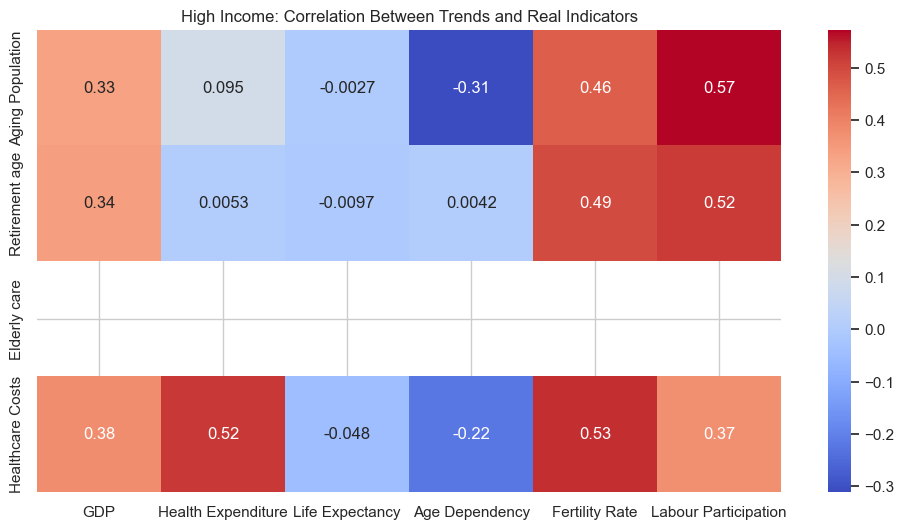

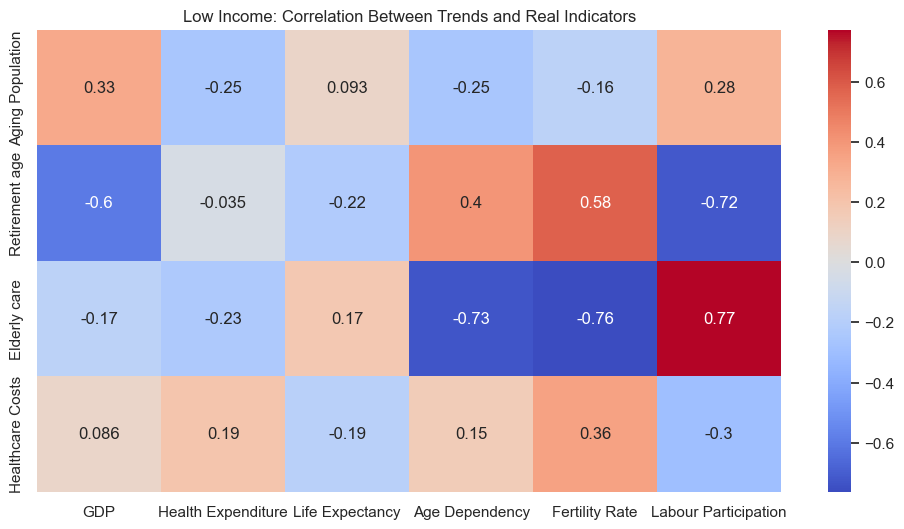

In [91]:
plt.figure(figsize=(12, 6))
sns.heatmap(corr_high, annot=True, cmap='coolwarm')
plt.title('High Income: Correlation Between Trends and Real Indicators')
plt.show()

plt.figure(figsize=(12, 6))
sns.heatmap(corr_low, annot=True, cmap='coolwarm')
plt.title('Low Income: Correlation Between Trends and Real Indicators')
plt.show()


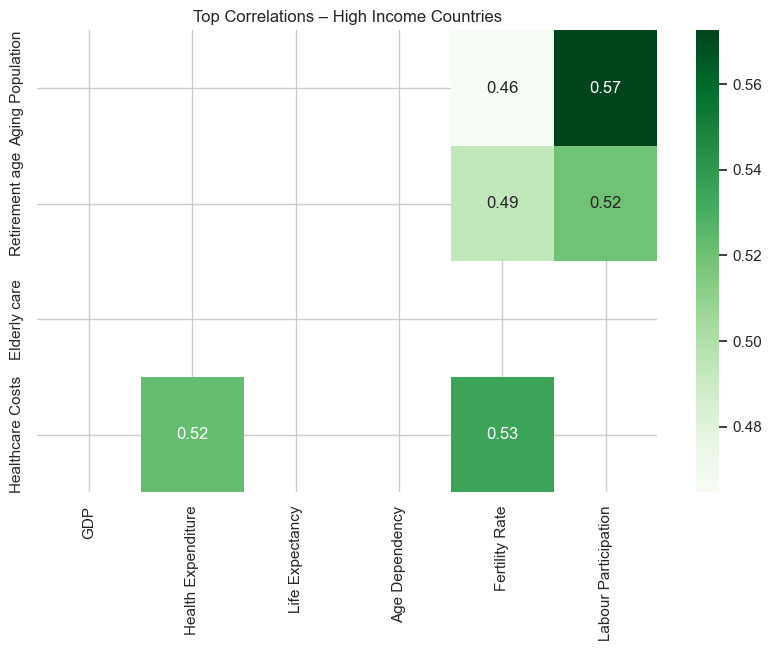

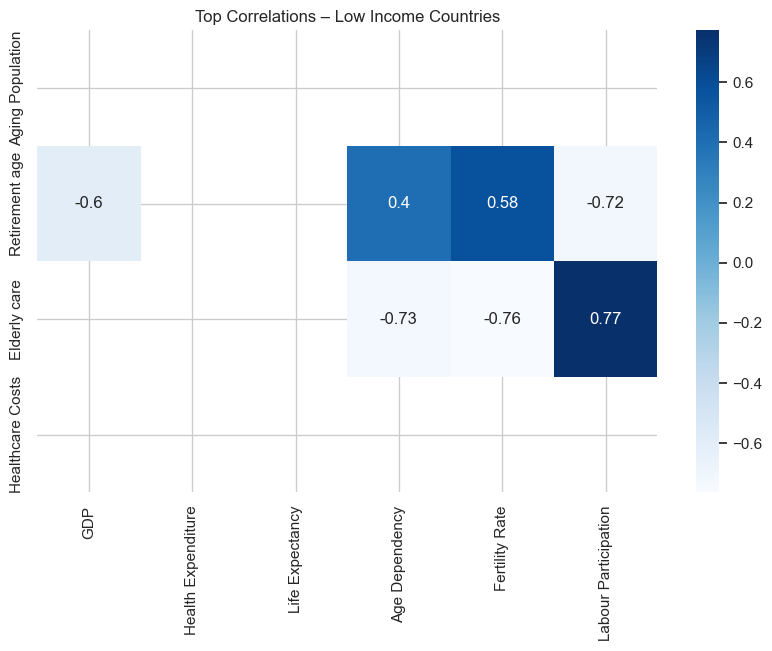

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter top correlations (abs > 0.4)
high_top = corr_high[(corr_high.abs() > 0.4)]
low_top = corr_low[(corr_low.abs() > 0.4)]

# Heatmap for High-Income
plt.figure(figsize=(10, 6))
sns.heatmap(high_top, annot=True, cmap='Greens', mask=high_top.isnull())
plt.title('Top Correlations – High Income Countries')
plt.show()

# Heatmap for Low-Income
plt.figure(figsize=(10, 6))
sns.heatmap(low_top, annot=True, cmap='Blues', mask=low_top.isnull())
plt.title('Top Correlations – Low Income Countries')
plt.show()


High-income countries:

"In wealthier nations, rising public concern about healthcare costs is positively associated with health expenditure and fertility rate. Similarly, aging population concern aligns with labour force participation, suggesting awareness-driven policy focus."

Low-income countries:

"Interestingly, in low-income countries, elderly care concerns show a strong positive correlation with labour participation, but a strong negative correlation with fertility and age dependency — hinting at shifting social structures."


🔍 Correlation Between Public Concerns and Real Indicators (Country-Level):
                       GDP  Health Expenditure  Life Expectancy  \
Aging Population  0.046669           -0.234174         0.024627   
Retirement age    0.095978            0.049422         0.133498   
Elderly care     -0.171899           -0.167997         0.110486   
Healthcare Costs  0.155667            0.172129        -0.114562   

                  Age Dependency  Fertility Rate  Labour Participation  
Aging Population       -0.318611       -0.096287              0.186235  
Retirement age         -0.042478       -0.218329              0.033001  
Elderly care           -0.188918       -0.312109             -0.252501  
Healthcare Costs        0.036841        0.138894              0.322214  


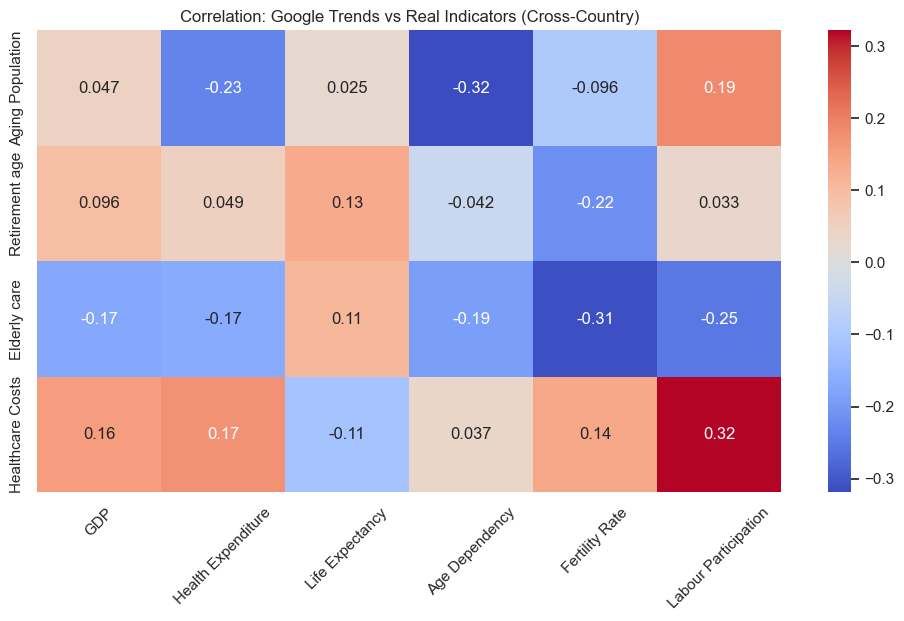

In [93]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


# Define real-world indicator columns and trend columns
trend_cols = ['Aging Population', 'Retirement age', 'Elderly care', 'Healthcare Costs']
real_cols = ['GDP', 'Health Expenditure', 'Life Expectancy', 'Age Dependency', 'Fertility Rate', 'Labour Participation']

# 1. Average real-world indicators per country
real_avg = df.groupby('Country Name')[real_cols].mean().reset_index()

# 2. Get one row per country for trend data (static per country)
trend_data = df.groupby('Country Name')[trend_cols].first().reset_index()

# 3. Merge both
country_level_df = pd.merge(real_avg, trend_data, on='Country Name')

# Optional: Add income group if present
if 'IncomeGroup' in df.columns:
    income_group = df[['Country Name', 'IncomeGroup']].drop_duplicates()
    country_level_df = pd.merge(country_level_df, income_group, on='Country Name', how='left')

# 4. Correlation matrix: Trends vs Real Indicators
corr_matrix = country_level_df[trend_cols + real_cols].corr().loc[trend_cols, real_cols]
print("\n🔍 Correlation Between Public Concerns and Real Indicators (Country-Level):")
print(corr_matrix)

# 5. Visualize correlations as heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation: Google Trends vs Real Indicators (Cross-Country)')
plt.xticks(rotation=45)
plt.show()


Aging Population:

Slight positive correlation with Labour Participation (0.19), hinting that countries with higher concern about aging populations tend to have more active labour forces.

Negative correlation with Age Dependency (-0.32) — which might suggest that greater concern is in countries where dependency ratios are lower, or it could be due to country-specific factors.

Retirement Age:

Weak positive correlations with Life Expectancy (0.13) and GDP (0.10), which aligns with the idea that richer and healthier countries are concerned more about retirement issues.

Elderly Care:

Moderate negative correlations with GDP, health expenditure, fertility, and labour participation — which could mean in wealthier countries elderly care concern might be lower or better managed.

Healthcare Costs:

Moderate positive correlations with Health Expenditure (0.17) and Labour Participation (0.32), indicating that concern about healthcare costs is linked to higher spending and possibly a more active workforce.

